# Introduction

## Problem Statement
- Use the dataset to figure out the patterns that can help in determining whether the underlying applicant will default on the loan or not
- There are two types of risk associated:
    - Denying loan application for someone who is likely to pay will result in loss of business
    - Approving loan application for someone who is likely to default will result in financial loss of the company

- The target variables take two values:
    - 1: applicant made late payment more than X days in the first Y installments
    - 0: applicant paid on time
- There are two types of decisions that could be taken by the company:
    - Approved: loan accepted by the company
    - Refused: loan rejected by the company because client doesn't meet specified requirements
- There are two types of decisions that could be taken by the client:
    - Cancelled: client cancelled the loan application sometime during approval
    - Unused offer: client cancelled the loan at different stage of the process

## Aim
- Identify people who are more likely to default

## Outcome
- Identify people who are less likely to default.
- Identify people who are more likely to default. This will help the company to
    - Reduced loan time
    - Lending at a higher interest
    - Rejecting th loan

## Hints provided
1. In EDA, it's not necessary to remove missing. But in case if you had to, then mention the method and justification for the same
2. Identify outliers and mention why do you think it is an outlier in the dataset
3. Analyse the data imbalance
4. Choose plots and scales according to your need
5. Use univariate and bivariate analysis
6. Run analysis in loops as there are a lot of columns
7. Find top 10 highly correlated variables wrt target variable
8. Use visualization

# 0. Import Libraries

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 1. Read Data

In [2]:
df_app = pd.read_csv("application_data.csv", sep=",", header="infer")
df_prev = pd.read_csv("previous_application.csv", sep=",", header="infer")

# 2. Explore Few Rows of Data

In [3]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Displaying info about the dataset

In [5]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

### Interpretation
106 numeric columns and 16 object columns

In [6]:
df_prev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Interpretation
21 numeric columns and 16 object columns

### Shape

In [7]:
df_app.shape

(307511, 122)

In [8]:
df_prev.shape

(1670214, 37)

# 4. Dealing with missing values

### Dealing with missing values where missing percentage >40

In [9]:
def check_missing_val_perc(df):
    """
        Input: df dataframe
        Output: list containing column names having missing percentage >= 40%
        Description: prints the names of columns, missing count, and missing percentage 
        where missing percentage >= 40% in the df
        and returns the list of names of columns having missing percentage >= 40%
    """
    col_missing_perc_ge_40 = []
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        missing_percentage = (missing_count / df[col].size)*100
        
        print(f"Column: {col}", "\n Missing Count: ", missing_count, "\n Missing Percentage", missing_percentage)
        print("=" * 40)
        
        # Storing the names of columns having missing percentage greater than or equal to 40 in a list
        if missing_percentage >= 40.00:
            col_missing_perc_ge_40.append(col)
            
    return col_missing_perc_ge_40

In [10]:
app_col_missing_perc_ge_than_40 = [] # List for columns having missing perc >= 40% for application_data dataframe
prev_col_missing_perc_ge_than_40 = [] # List for columns having missing perc >= 40% for previous_application dataframe

# Application Data
print("Application Data Missing Percentage: ")
print("-" * 40)
app_col_missing_perc_ge_than_40 = check_missing_val_perc(df_app)
print("Total number of columns where missing percentage >= 40% for Application Data", len(app_col_missing_perc_ge_than_40))
print("=" * 40)

# Previous Application Data
print("Previous Application Data Missing Percentage: ")
print("-" * 40)
prev_col_missing_perc_ge_than_40 = check_missing_val_perc(df_prev)
print("Total number of columns where missing percentage >= 40% for Previous Application Data", len(prev_col_missing_perc_ge_than_40))
print("=" * 40)

Application Data Missing Percentage: 
----------------------------------------
Column: SK_ID_CURR 
 Missing Count:  0 
 Missing Percentage 0.0
Column: TARGET 
 Missing Count:  0 
 Missing Percentage 0.0
Column: NAME_CONTRACT_TYPE 
 Missing Count:  0 
 Missing Percentage 0.0
Column: CODE_GENDER 
 Missing Count:  0 
 Missing Percentage 0.0
Column: FLAG_OWN_CAR 
 Missing Count:  0 
 Missing Percentage 0.0
Column: FLAG_OWN_REALTY 
 Missing Count:  0 
 Missing Percentage 0.0
Column: CNT_CHILDREN 
 Missing Count:  0 
 Missing Percentage 0.0
Column: AMT_INCOME_TOTAL 
 Missing Count:  0 
 Missing Percentage 0.0
Column: AMT_CREDIT 
 Missing Count:  0 
 Missing Percentage 0.0
Column: AMT_ANNUITY 
 Missing Count:  12 
 Missing Percentage 0.003902299429939092
Column: AMT_GOODS_PRICE 
 Missing Count:  278 
 Missing Percentage 0.09040327012692229
Column: NAME_TYPE_SUITE 
 Missing Count:  1292 
 Missing Percentage 0.42014757195677555
Column: NAME_INCOME_TYPE 
 Missing Count:  0 
 Missing Percentage 0

Column: HOUSETYPE_MODE 
 Missing Count:  154297 
 Missing Percentage 50.176091261776
Column: TOTALAREA_MODE 
 Missing Count:  148431 
 Missing Percentage 48.26851722377411
Column: WALLSMATERIAL_MODE 
 Missing Count:  156341 
 Missing Percentage 50.8407829313423
Column: EMERGENCYSTATE_MODE 
 Missing Count:  145755 
 Missing Percentage 47.39830445089769
Column: OBS_30_CNT_SOCIAL_CIRCLE 
 Missing Count:  1021 
 Missing Percentage 0.3320206431639844
Column: DEF_30_CNT_SOCIAL_CIRCLE 
 Missing Count:  1021 
 Missing Percentage 0.3320206431639844
Column: OBS_60_CNT_SOCIAL_CIRCLE 
 Missing Count:  1021 
 Missing Percentage 0.3320206431639844
Column: DEF_60_CNT_SOCIAL_CIRCLE 
 Missing Count:  1021 
 Missing Percentage 0.3320206431639844
Column: DAYS_LAST_PHONE_CHANGE 
 Missing Count:  1 
 Missing Percentage 0.00032519161916159093
Column: FLAG_DOCUMENT_2 
 Missing Count:  0 
 Missing Percentage 0.0
Column: FLAG_DOCUMENT_3 
 Missing Count:  0 
 Missing Percentage 0.0
Column: FLAG_DOCUMENT_4 
 Mis

Column: NFLAG_INSURED_ON_APPROVAL 
 Missing Count:  673065 
 Missing Percentage 40.29812946125467
Total number of columns where missing percentage >= 40% for Previous Application Data 11


### Interpretation
There are a total of __49__ columns in application data and __11__ columns in previous application data having missing percentage >= 40% <br>
Approaches that can be taken to deal with the missing values are: <br>
- Replace the missing values with with 0
    - This will not be a good option as there are many columns having missing percentage >50% as well. And assumning a value may hamper the underlying distribution of the data
- Replace the missing values with mean/median/mode
    - This also will not be a good option as this might skew the data to some extent
- Looking for external source of data to fill up the value
    - This is quite a tedious task and also we are not sure regarding the reason of missingness. Eg the value might be Missing Completely At Random (MCAR), Missing At Random (MAR), or Missing Not At Random (MNAR)
- Dropping the columns
    - Since there are a total of 49 columns having missing percentage >= 40%, dropping them is the only option left
    - Hence, going forward and dropping the columns

In [11]:
# Dropping columns
df_app_1 = df_app.drop(
    app_col_missing_perc_ge_than_40,
    axis=1
).copy()

df_prev_1 = df_prev.drop(
    prev_col_missing_perc_ge_than_40,
    axis=1
).copy()

### Interpretation
While checking the missing count and missing percentage we found that there are certain columns having missing percentage less than 5% <br>
Approaches that can be taken are
- Impute the missing values
    - Since, the percentage of missing value is quite less, imputing could be an option, however, it might also affect the outcome of the analysis, not to a greater extent but it might to a lower extent
- Remove the missing values
    - Removing them will be a better choice because, as the percentage is quite less, it will not impact the overall analysis
    - One thing we need to first take into account is for which columns the rows need to be removed

### Dealing with missing values where missing percentage >0 and <=5

In [12]:
def check_missing_val_perc_le_5(df):
    """
        Input: df dataframe
        Output: list containing column names having missing percentage <= 5%
        Description: returns the list of names of columns having missing percentage <= 5%
    """
    col_missing_perc_le_5 = []
    for col in df.columns:
        missing_percentage = (df[col].isnull().sum() / df[col].size)*100
        # Storing the names of columns having missing percentage less than or equal to 30 in a list
        if missing_percentage <= 5.00 and missing_percentage > 0.00:
            col_missing_perc_le_5.append(col)
            
    return col_missing_perc_le_5

In [13]:
app_col_missing_perc_le_than_5 = [] # List for columns having missing perc > 0% and <= 5% for application_data dataframe
prev_col_missing_perc_le_than_5 = [] # List for columns having missing perc > 0% and <= 5% for previous_application dataframe

# Application Data
print("Application Data Missing Percentage Less than 5: ")
print("-" * 40)
app_col_missing_perc_le_than_5 = check_missing_val_perc_le_5(df_app_1)
print("Application columns missing percentage <= 5%: \n", app_col_missing_perc_le_than_5)
print("=" * 40)

# Previous Application Data
print("Previous Application Data Missing Percentage Less than 5: ")
print("-" * 40)
prev_col_missing_perc_le_than_5 = check_missing_val_perc_le_5(df_prev_1)
print("Previous Application columns missing percentage <= 5%: \n", prev_col_missing_perc_le_than_5)
print("=" * 40)

Application Data Missing Percentage Less than 5: 
----------------------------------------
Application columns missing percentage <= 5%: 
 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
Previous Application Data Missing Percentage Less than 5: 
----------------------------------------
Previous Application columns missing percentage <= 5%: 
 ['AMT_CREDIT', 'PRODUCT_COMBINATION']


In [14]:
# Exploring the values in the columns
for col in app_col_missing_perc_le_than_5:
    print("Column: ", col, "\n")
    print(df_app_1[col][:5])
    print(df_app_1[col].dtype)
    print("-" * 40)
    
print("=" * 40)

for col in prev_col_missing_perc_le_than_5:
    print("Column: ", col, "\n")
    print(df_prev_1[col][:5])
    print(df_prev_1[col].dtype)
    print("-"*40)

Column:  AMT_ANNUITY 

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64
float64
----------------------------------------
Column:  AMT_GOODS_PRICE 

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64
float64
----------------------------------------
Column:  NAME_TYPE_SUITE 

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
object
----------------------------------------
Column:  CNT_FAM_MEMBERS 

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64
float64
----------------------------------------
Column:  EXT_SOURCE_2 

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64
float64
----------------------------------------
Column:  OBS_30_CNT_SOCIAL_CIRCLE 

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CN

### Interpretation
- All the columns in the above output of print statement holds a significant value and could be used to determine whether a person will default or not
- Hence, assuming values (mean, median, mode) for such columns may hamper the outcome of analysis
- Hence, taking this decision to drop the rows where these columns have null values

### Dropping rows where missing percentage > 0 and <= 5

In [15]:
df_app_2 = df_app_1.dropna(
    subset=app_col_missing_perc_le_than_5,
    how="any"
).copy()

df_prev_2 = df_prev_1.dropna(
    subset=prev_col_missing_perc_le_than_5,
    how="any"
).copy()

In [16]:
# Checking the shape once again
df_app_2.shape, df_prev_2.shape

((304531, 73), (1669867, 26))

### Dealing with missing values where missing percentage >5 and <40 

In [17]:
def check_missing_val_perc_l_40(df):
    """
        Input: df dataframe
        Output: list containing column names having missing percentage >5% and <40%
        Description: returns the list of names of columns having missing percentage >5% and <40%
    """
    col_missing_perc_l_40 = []
    for col in df.columns:
        missing_percentage = (df[col].isnull().sum() / df[col].size)*100
        # Storing the names of columns having missing percentage less than or equal to 30 in a list
        if missing_percentage > 5.00 and missing_percentage < 40.00:
            col_missing_perc_l_40.append(col)
            
    return col_missing_perc_l_40

In [18]:
app_col_missing_perc_l_40 = [] # List for columns having missing perc >5% and <40% for application_data dataframe
prev_col_missing_perc_l_40 = [] # List for columns having missing perc >5% and <40% for previous_application dataframe

# Application Data
print("Application Data Missing Percentage >5% and <40%: ")
print("-" * 40)
app_col_missing_perc_l_40 = check_missing_val_perc_l_40(df_app_2)
print("Application columns missing percentage >5% and <40%: \n", app_col_missing_perc_l_40)
print("=" * 40)

# Previous Application Data
print("Previous Application Data Missing Percentage >5% and <40%: ")
print("-" * 40)
prev_col_missing_perc_l_40 = check_missing_val_perc_l_40(df_prev_2)
print("Previous Application columns missing percentage >5% and <40%: \n", prev_col_missing_perc_l_40)
print("=" * 40)

Application Data Missing Percentage >5% and <40%: 
----------------------------------------
Application columns missing percentage >5% and <40%: 
 ['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Previous Application Data Missing Percentage >5% and <40%: 
----------------------------------------
Previous Application columns missing percentage >5% and <40%: 
 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']


In [19]:
# Exploring the columns having missing percentage >5% and <40%
for col in app_col_missing_perc_l_40:
    print("Column: ", col, "\n")
    print(df_app_2[col][:5])
    print(df_app_2[col].dtype)
    print("-" * 40)
    
print("=" * 40)

for col in prev_col_missing_perc_l_40:
    print("Column: ", col, "\n")
    print(df_prev_2[col][:5])
    print(df_prev_2[col].dtype)
    print("-" * 40)

Column:  OCCUPATION_TYPE 

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object
object
----------------------------------------
Column:  EXT_SOURCE_3 

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64
float64
----------------------------------------
Column:  AMT_REQ_CREDIT_BUREAU_HOUR 

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
float64
----------------------------------------
Column:  AMT_REQ_CREDIT_BUREAU_DAY 

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
float64
----------------------------------------
Column:  AMT_REQ_CREDIT_BUREAU_WEEK 

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
float64
----------------------------------------
Column:  AMT_REQ_CREDIT_BUREAU_MON 

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: A

In [20]:
def print_unique(df, cols):
    for col in cols:
        print(f"Column {col} \n", df[col].unique())
        print("-" * 40)

In [21]:
print_unique(df_app_2, app_col_missing_perc_l_40)
print_unique(df_prev_2, prev_col_missing_perc_l_40)

Column OCCUPATION_TYPE 
 ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
----------------------------------------
Column EXT_SOURCE_3 
 [1.39375780e-01            nan 7.29566691e-01 6.21226338e-01
 4.92060094e-01 5.40654450e-01 7.51723715e-01 3.63945239e-01
 6.52896552e-01 1.76652579e-01 7.70087070e-01 6.78567689e-01
 6.21030378e-02 5.56727426e-01 4.77649155e-01 5.42445144e-01
 3.58951229e-01 6.69056695e-01 5.65607981e-01 4.61482391e-01
 1.90705948e-01 6.59405532e-01 5.24496446e-01 4.10102573e-01
 7.98137231e-01 4.11848556e-01 7.54406173e-01 7.22392890e-01
 6.05836265e-01 3.20163367e-01 3.99675616e-01 6.84827659e-01
 4.75849909e-01 7.28141299e-01 4.66864006e-01 4.79448981e-01
 3.09275356e-01 7.99296783e-01 7.01695774e-01 7.38019620e-01
 7.01088

Column AMT_GOODS_PRICE 
 [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
----------------------------------------
Column CNT_PAYMENT 
 [12. 36. 24. 18. nan 54. 30.  8.  3.  6.  0. 48. 10. 60. 42.  4.  5. 16.
 20.  7. 14.  9. 22. 15. 11. 13. 17. 26. 23. 38. 33. 72. 59. 34. 84. 28.
 41. 66. 29. 32. 44. 39. 40. 46. 35. 19. 47. 45. 21. 53.]
----------------------------------------


In [22]:
# Checking the missing value counts for application data
print("Application data missing value count: ")
print(df_app_2[app_col_missing_perc_l_40].isnull().sum())
print("=" * 40)

Application data missing value count: 
OCCUPATION_TYPE               95435
EXT_SOURCE_3                  60251
AMT_REQ_CREDIT_BUREAU_HOUR    41108
AMT_REQ_CREDIT_BUREAU_DAY     41108
AMT_REQ_CREDIT_BUREAU_WEEK    41108
AMT_REQ_CREDIT_BUREAU_MON     41108
AMT_REQ_CREDIT_BUREAU_QRT     41108
AMT_REQ_CREDIT_BUREAU_YEAR    41108
dtype: int64


### Interpretation for Application Data
1. __OCCUPATION_TYPE__
    - The count of missing values is pretty high i.e., around 95,000. Replacing the value with mode isn't a good option as it may hamper the outcome of analysis
    - Hence, replacing the missing values by creating a new category "Others" <br>
2. __EXT_SOURCE_3__
    - The count of missing values is high i.e., around 60,000.
    - There are two approaches that can be taken to replace the missing values
        - Replace with the value of EXT_SOURCE_2
        - Drop column EXT_SOURCE_3, assuming that normalized score will be close or same as of EXT_SOURCE_2
        - Hence, dropping the column and renaming EXT_SOURCE_2 to EXT_SOURCE
3. __AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR__
    - Approach 1: Since these columns represent the number of enquiries about the applicant to the credit bureau before a certain period of time of applying for loan, we can replace the nan values with 0, it will mean that the enquiry for that applicant didn't happen which seems to be both valid and invalid. Valid in the case of new applicant who doesn't have a credit score and invalid if the applicant had previously applied and does possess a credit score
    - Approach 2: Drop the rows where the value is nan, but we do have some records for the same applicant in the previous application dataset. Hence, we can't drop these rows
    - So the decision is to retain the null values

In [23]:
# Creating a new category "Others" for OCCUPATION_TYPE column
df_app_2["OCCUPATION_TYPE"].fillna("Others", inplace=True)
df_app_2["OCCUPATION_TYPE"].isnull().sum()

0

In [24]:
# Dropping EXT_SOURCE_3 and renaming EXT_SOURCE_2 to EXT_SOURCE
df_app_3 = df_app_2.drop(labels=["EXT_SOURCE_3"], axis=1).copy()
df_app_3.rename(columns={"EXT_SOURCE_2": "EXT_SOURCE"}, inplace=True)

### Checking if the applicant whose credit bureau results are nan previously applied for loan or not

In [25]:
df_prev_2[df_prev_2.SK_ID_CURR.isin(
    df_app_2[df_app_2.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()].SK_ID_CURR.unique()
)].SK_ID_CURR.unique().shape

(39027,)

### Interpretation
1. Out of 41,108 applicants, 39,027 had previously applied for a loan. However, the details of the enquiry to the credit bureau for these applicants weren't recorded during current application.

### Suggestion
- Even if the applicant had applied previously for a loan, it is necessary to check and enquire to the credit bureau

### Exploring values of previous application data where null value percentage >5% and <40%

In [26]:
# Checking the missing value counts for previous application data
print("Previous Application data missing value count: ")
print(df_prev_2[prev_col_missing_perc_l_40].isnull().sum())
print("=" * 40)

Previous Application data missing value count: 
AMT_ANNUITY        371889
AMT_GOODS_PRICE    385168
CNT_PAYMENT        371884
dtype: int64


### Interpretation for Previous Application Data
1. AMT_ANNUITY
    - ANNUITY is nothing but the EMI or interest that needs to be paid on the loan
    - None of the loan exists where the applicant doesn't need to repay the loan
    - Hence, the best option is to drop these rows where ANNUITY is nan

In [27]:
df_prev_3 = df_prev_2[df_prev_2["AMT_ANNUITY"].notnull()].copy()

In [28]:
# Re-checking the missing value counts for previous application data
print("Previous Application data missing value count: ")
print(df_prev_3[prev_col_missing_perc_l_40].isnull().sum())
print("=" * 40)

Previous Application data missing value count: 
AMT_ANNUITY            0
AMT_GOODS_PRICE    51658
CNT_PAYMENT            0
dtype: int64


In [29]:
df_prev_3[df_prev_3["AMT_GOODS_PRICE"].isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
80,2012211,282125,Revolving loans,33750.0,0.0,675000.0,NaN,FRIDAY,17,Y,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
93,2522811,120854,Revolving loans,33750.0,0.0,675000.0,NaN,THURSDAY,18,Y,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
143,1975174,276237,Revolving loans,22500.0,0.0,450000.0,NaN,TUESDAY,13,Y,...,Repeater,XNA,Cards,x-sell,Country-wide,1500,Consumer electronics,0.0,XNA,Card X-Sell
145,1375746,227908,Revolving loans,2250.0,0.0,45000.0,NaN,SATURDAY,19,Y,...,Repeater,XNA,Cards,x-sell,Country-wide,2708,Consumer electronics,0.0,XNA,Card X-Sell
277,2770539,185661,Revolving loans,6750.0,0.0,180000.0,NaN,THURSDAY,11,N,...,Repeater,XNA,Cards,x-sell,Country-wide,2024,Consumer electronics,0.0,XNA,Card Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669839,2828113,172400,Revolving loans,22500.0,0.0,900000.0,NaN,FRIDAY,10,N,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
1669959,2213677,364426,Revolving loans,22500.0,0.0,450000.0,NaN,FRIDAY,18,Y,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
1669960,1731392,180860,Revolving loans,11250.0,0.0,225000.0,NaN,TUESDAY,17,Y,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
1669962,2017672,268190,Revolving loans,22500.0,0.0,450000.0,NaN,FRIDAY,18,Y,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell


In [30]:
df_prev_3[(df_prev_3["AMT_GOODS_PRICE"].isnull()) & (df_prev_3["NAME_CONTRACT_TYPE"] != "Revolving loans")]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


### Interpretation
- AMT_GOODS_PRICE value is NaN for loans of type Revolving
- Revolving loans are type of loan where the applicant can withdraw, repay, and withdraw after a certain period of time. Eg: credit cards
- Hence, for these type of loans the price of goods is expected to be not applicable
- Hence, not dropping rows for these columns

# 5. Checking and Dealing with invalid values

## a. Categorical columns - XNA and XAP

In [31]:
# Checking unique values for categorical column
def unique_val(df):
    """
        input: dataframe
        output: returns the unique values for columns with dtype as object
        returns: this method doesn't return anything
    """
    for col in df.columns:
        # Check for object data type
        if df[col].dtype == "O":
            print(f"Column {col}: ", df[col].unique())

In [32]:
unique_val(df_app_3)
print("=" * 40)
unique_val(df_prev_3)
print("=" * 40)

Column NAME_CONTRACT_TYPE:  ['Cash loans' 'Revolving loans']
Column CODE_GENDER:  ['M' 'F' 'XNA']
Column FLAG_OWN_CAR:  ['N' 'Y']
Column FLAG_OWN_REALTY:  ['Y' 'N']
Column NAME_TYPE_SUITE:  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Column NAME_INCOME_TYPE:  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Column NAME_EDUCATION_TYPE:  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Column NAME_FAMILY_STATUS:  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
Column NAME_HOUSING_TYPE:  ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Column OCCUPATION_TYPE:  ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Others' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Sec

### Interpretation for Application Data and Previous Application Daa
- Following columns contain invalid values such as __XNA, XAP__
    1. CODE_GENDER
    2. ORGANIZATION_TYPE
    3. NAME_CASH_LOAN_PURPOSE
    4. NAME_PAYMENT_TYPE
    5. CODE_REJECT_REASON
    6. NAME_CLIENT_TYPE
    7. NAME_GOODS_CATEGORY
    8. NAME_PRODUCT_TYPE
    9. NAME_SELLER_INDUSTRY
    10. NAME_YIELD_GROUP

#### Checking and dealing each column with invalid data

In [33]:
# 1. Percentage of unique values for CODE_GENDER
print(df_app_3["CODE_GENDER"].value_counts(normalize=True)*100)
print(df_app_3["CODE_GENDER"].value_counts())

F      65.833035
M      34.165651
XNA     0.001313
Name: CODE_GENDER, dtype: float64
F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64


### Interpretation
1. Females have applied more for loans compared to men
2. The number of missing values for gender are just 4, hence replacing them with F as it's the most occuring value

In [34]:
df_app_3["CODE_GENDER"].replace("XNA", "F", inplace=True)

In [35]:
# 2. Percentage of unique values for ORGANIZATION_TYPE
print(df_app_3["ORGANIZATION_TYPE"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_app_3["ORGANIZATION_TYPE"].value_counts())

Business Entity Type 3    22.089705
XNA                       18.011959
Self-employed             12.493966
Other                      5.433273
Medicine                   3.637725
Business Entity Type 2     3.434133
Government                 3.384877
School                     2.897242
Trade: type 7              2.551136
Kindergarten               2.240494
Construction               2.186641
Business Entity Type 1     1.943644
Transport: type 4          1.757785
Trade: type 3              1.130591
Industry: type 9           1.092828
Industry: type 3           1.068528
Security                   1.055722
Housing                    0.963777
Industry: type 11          0.881684
Military                   0.857056
Bank                       0.806158
Agriculture                0.799919
Police                     0.761499
Transport: type 2          0.717168
Postal                     0.701735
Security Ministries        0.641314
Trade: type 2              0.614387
Restaurant                 0

### Interpretation
1. Count of XNA values is considerably larger but less than 40%.
2. Hence, assuming a new category will not be a feasible choice
3. Hence, replacing XNA with exising Other category

In [36]:
df_app_3["ORGANIZATION_TYPE"].replace("XNA", "Other", inplace=True)

In [37]:
# 3. Percentage of unique values for NAME_CASH_LOAN_PURPOSE
print(df_prev_3["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["NAME_CASH_LOAN_PURPOSE"].value_counts())

XAP                                 64.439844
XNA                                 30.215535
Repairs                              1.825763
Other                                1.194088
Urgent needs                         0.647546
Buying a used car                    0.221267
Building a house or an annex         0.207477
Everyday expenses                    0.184441
Medicine                             0.166952
Payments on other loans              0.148385
Education                            0.120726
Journey                              0.095148
Purchase of electronic equipment     0.081280
Buying a new car                     0.077505
Wedding / gift / holiday             0.073730
Buying a home                        0.066642
Car repairs                          0.061403
Furniture                            0.057628
Buying a holiday home / land         0.041064
Business development                 0.032743
Gasification / water supply          0.023036
Buying a garage                   

### Interpretation
1. Approximately 94% of the values are invalid
2. Categorizing the invalid values as __"Other" or "Refusal to name the goal"__ will skew the data
3. Hence, creating a new category "Unavailable"

In [38]:
df_prev_3["NAME_CASH_LOAN_PURPOSE"].replace(["XNA", "XAP"], "Unavailable", inplace=True)

In [39]:
# 4. Percentage of unique values for NAME_PAYMENT_TYPE
print(df_prev_3["NAME_PAYMENT_TYPE"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["NAME_PAYMENT_TYPE"].value_counts())

Cash through the bank                        76.806772
XNA                                          22.484819
Non-cash from your account                    0.625974
Cashless from the account of the employer     0.082436
Name: NAME_PAYMENT_TYPE, dtype: float64
Cash through the bank                        996935
XNA                                          291848
Non-cash from your account                     8125
Cashless from the account of the employer      1070
Name: NAME_PAYMENT_TYPE, dtype: int64


### Interpretation
1. Majority of the payment type was done using the type: Cash through the bank and very less applicant opted for payment type such as Non-cash from your account, or Cashless from the account of the employer
2. Hence, replacing the missing value with cash through the bank

In [40]:
df_prev_3["NAME_PAYMENT_TYPE"].replace("XNA", "Cash through the bank", inplace=True)

In [41]:
# 5. Percentage of unique values for CODE_REJECT_REASON
print(df_prev_3["CODE_REJECT_REASON"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["CODE_REJECT_REASON"].value_counts())

XAP       80.685420
HC        11.301116
LIMIT      3.932347
SCO        2.762451
SCOFR      0.667423
VERIF      0.270112
XNA        0.260405
CLIENT     0.070263
SYSTEM     0.050463
Name: CODE_REJECT_REASON, dtype: float64
XAP       1047279
HC         146686
LIMIT       51041
SCO         35856
SCOFR        8663
VERIF        3506
XNA          3380
CLIENT        912
SYSTEM        655
Name: CODE_REJECT_REASON, dtype: int64


In [42]:
df_prev_3[df_prev_3["CODE_REJECT_REASON"].isin(["XNA", "XAP"])]["NAME_CONTRACT_STATUS"].value_counts()

Approved    1036772
Canceled      10514
Refused        3373
Name: NAME_CONTRACT_STATUS, dtype: int64

### Interpretation
1. Approximately 81% values are invalid
2. The contract status is approved for majority of the clients and hence the reject reason is unavailable which makes sense. This is a case of MNAR
3. Assuming values for this column will skew the data, hence keeping it as it is for now
4. XNA and XAP values will not be considered during visualization

In [43]:
# 6. Percentage of unique values for NAME_CLIENT_TYPE
print(df_prev_3["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["NAME_CLIENT_TYPE"].value_counts())

Repeater     68.659946
New          22.702311
Refreshed     8.568327
XNA           0.069416
Name: NAME_CLIENT_TYPE, dtype: float64
Repeater     891191
New          294671
Refreshed    111215
XNA             901
Name: NAME_CLIENT_TYPE, dtype: int64


### Interpretation
1. Very less amount of invalid values
2. Hence, replacing the invalid values with the most frequently occuring values i.e., Repeater

In [44]:
df_prev_3["NAME_CLIENT_TYPE"].replace("XNA", "Repeater", inplace=True)

In [45]:
# 7. Percentage of unique values for NAME_GOODS_CATEGORY
print(df_prev_3["NAME_GOODS_CATEGORY"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["NAME_GOODS_CATEGORY"].value_counts())

XNA                         47.375071
Mobile                      15.434314
Consumer Electronics         9.243685
Computers                    7.703366
Audio/Video                  7.532870
Furniture                    4.105385
Construction Materials       1.915749
Clothing and Accessories     1.803420
Photo / Cinema Equipment     1.783774
Auto Accessories             0.551088
Jewelry                      0.482289
Homewares                    0.385060
Medical Supplies             0.295922
Vehicles                     0.256938
Sport and Leisure            0.227200
Gardening                    0.204395
Other                        0.196768
Office Appliances            0.176813
Tourism                      0.127198
Medicine                     0.119417
Direct Sales                 0.034284
Fitness                      0.016102
Additional Service           0.009861
Education                    0.008244
Weapon                       0.005855
Insurance                    0.004777
House Constr

In [46]:
df_prev_3[df_prev_3["NAME_GOODS_CATEGORY"] == "XNA"]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670206,2459206,238591,Cash loans,19401.435,180000.0,243936.0,180000.0,TUESDAY,13,Y,...,New,XNA,Cash,walk-in,Credit and cash offices,100,XNA,24.0,high,Cash Street: high
1670207,1662353,443544,Cash loans,12607.875,112500.0,112500.0,112500.0,MONDAY,10,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,100,XNA,12.0,high,Cash Street: high
1670208,1556789,209732,Cash loans,22299.390,315000.0,436216.5,315000.0,THURSDAY,17,Y,...,Refreshed,XNA,Cash,x-sell,Credit and cash offices,100,XNA,36.0,middle,Cash X-Sell: middle
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


### Interpretation
1. 47% values are invalid
2. Not all the loans applied will be oriented towards goods
3. Hence, assuming values for this column will skew the data, hence keeping it as it is for now
4. XNA values will not be considered during visualization

In [47]:
# 8. Percentage of unique values for NAME_PRODUCT_TYPE
print(df_prev_3["NAME_PRODUCT_TYPE"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["NAME_PRODUCT_TYPE"].value_counts())

XNA        53.269932
x-sell     35.153600
walk-in    11.576467
Name: NAME_PRODUCT_TYPE, dtype: float64
XNA        691432
x-sell     456286
walk-in    150260
Name: NAME_PRODUCT_TYPE, dtype: int64


### Interpretation
1. Majority of the values are invalid
2. Replacing it with x-sell or walk-in will impact the end analysis
3. Hence, retaining the XNA values and not replacing them

In [48]:
# 9. Percentage of unique values for NAME_PRODUCT_TYPE
print(df_prev_3["NAME_SELLER_INDUSTRY"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["NAME_SELLER_INDUSTRY"].value_counts())

XNA                     40.277185
Consumer electronics    30.233563
Connectivity            18.777129
Furniture                4.416562
Construction             2.283398
Clothing                 1.834777
Industry                 1.469054
Auto technology          0.383288
Jewelry                  0.208632
MLM partners             0.076889
Tourism                  0.039523
Name: NAME_SELLER_INDUSTRY, dtype: float64
XNA                     522789
Consumer electronics    392425
Connectivity            243723
Furniture                57326
Construction             29638
Clothing                 23815
Industry                 19068
Auto technology           4975
Jewelry                   2708
MLM partners               998
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64


### Interpretation
1. Majority of the values are invalid
2. Replacing it with Other or most frequently occuring value might hamper the end analysis
3. Hence, retaining the XNA values and not replacing them
4. XNA values will not be considered during visualization

In [49]:
# 10. Percentage of unique values for NAME_PRODUCT_TYPE
print(df_prev_3["NAME_YIELD_GROUP"].value_counts(normalize=True)*100)
print("=" * 40)
print(df_prev_3["NAME_YIELD_GROUP"].value_counts())

middle        29.702429
high          27.221417
low_normal    24.815136
XNA           11.169912
low_action     7.091106
Name: NAME_YIELD_GROUP, dtype: float64
middle        385531
high          353328
low_normal    322095
XNA           144983
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64


In [50]:
df_prev_3[(df_prev_3["NAME_YIELD_GROUP"] == "XNA") & (df_prev_3["CNT_PAYMENT"] != 0.0)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


### Interpretation
1. According to the data dictionary, the NAME_YIELD_GROUP column is a column containing interest rate grouped into small, medium, and high of the previous application
2. Since the term of payment is 0.0 for values XNA, the grouped interest rate is not available. This is a case of MNAR
3. Hence, replacing the XNA value with small

In [51]:
df_prev_3["NAME_YIELD_GROUP"].replace("XNA", "small", inplace=True)

## b. Checking for nan values in numeric columns

In [52]:
def check_nan_val(df):
    """
        input: dataframe
        output: prints the list of numeric columns having nan values
        returns: this method doesn't return anything
    """
    for col in df.columns:
        # Ensure that the column is not of object type and if any value with nan is present
        if df[col].dtype != "O" and df[col].isnull().sum() > 0:
            print(col)
    print("=" * 40)

In [53]:
check_nan_val(df_app_3)
check_nan_val(df_prev_3)

AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
AMT_GOODS_PRICE


### Interpretation
For the above columns we have already decided not to drop the null values as it may hamper the end analysis. Please refer the above code and interpretation for the same

# 6. Sanity Check, Filtering, Replacing values with Invalid Conditions
## Application Data
1. Loan annuity should not be greater than credit amount in application data
2. TARGET should be only 1 and 0
3. AMT_INCOME_TOTAL should not be zero or less than 0
4. AMT_ANNUITY should not be zero or less than 0

## Previous Application Data
1. SK_ID_PREV should be greater than 0
2. SK_ID_CURR should be greater than 0
3. AMT_ANNUITY should be greater than 0
4. AMT_APPLICATION should be greater than 0
5. AMT_CREDIT should be greater than 0
6. Amount annuity should not be greater than credit amount in the previous application data
7. HOUR_APPR_PROCESS_START should not be negative and above 23
8. SELLERPLACE_AREA should be 0 or greater than 0
9. NAME_YIELD_GROUP should contain category as small, medium, and high (as per data dictionary)
10. FLAG_LAST_APPL_PER_CONTRACT should not be "N" - because mentioned in the data dictionary that there could be more applications for one single contract
11. NFLAG_LAST_APPL_IN_DAY should not be 0 - because mentioned in the data dictionary that the applications in the database are repeated twice

### Application Data Sanity Check

In [54]:
# 1. Loan annuity should not be greater than credit amount in application data
df_app_3[df_app_3["AMT_ANNUITY"] > df_app_3["AMT_CREDIT"]].shape

(0, 72)

In [55]:
# 2. TARGET should be only 1 and 0
df_app_3["TARGET"].unique()

array([1, 0], dtype=int64)

In [56]:
# 3. AMT_INCOME_TOTAL should not be zero or less than 0
df_app_3[df_app_3["AMT_INCOME_TOTAL"] <= 0].shape

(0, 72)

In [57]:
# 4. AMT_ANNUITY should not be zero or less than 0
df_app_3[df_app_3["AMT_ANNUITY"] <= 0].shape

(0, 72)

#### Previous Application Data Sanity Check

In [58]:
# 1. SK_ID_PREV should be greater than 0
df_prev_3[df_prev_3["SK_ID_PREV"] <= 0].shape

(0, 26)

In [59]:
# 2. SK_ID_CURR should be greater than 0
df_prev_3[df_prev_3["SK_ID_CURR"] <= 0].shape

(0, 26)

In [60]:
# 3. AMT_ANNUITY should be greater than 0
print("AMT_ANNUITY <= 0:", df_prev_3[df_prev_3["AMT_ANNUITY"] <= 0].shape)
print("Loan taken for amount: 0", df_prev_3[(df_prev_3["AMT_ANNUITY"] <= 0) & (df_prev_3["AMT_APPLICATION"] == 0)].shape)

AMT_ANNUITY <= 0: (1636, 26)
Loan taken for amount: 0 (1634, 26)


In [61]:
# 4. Loan applied for amount 0 doesn't make sense. Hence, filtering out rows where AMT_APPLICATION > 0
df_prev_4 = df_prev_3[df_prev_3["AMT_APPLICATION"] > 0.0].copy()

In [62]:
# 5. AMT_CREDIT should be not be negative
df_prev_4[df_prev_4["AMT_CREDIT"] < 0.0].shape

(0, 26)

In [63]:
# 6. Amount annuity should not be greater than credit amount in the previous application data
df_prev_4[(df_prev_4["AMT_ANNUITY"] > df_prev_4["AMT_CREDIT"])]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


In [64]:
# 7. HOUR_APPR_PROCESS_START should not be negative and above 23
df_prev_4[(df_prev_4["HOUR_APPR_PROCESS_START"] < 0) & (df_prev_4["HOUR_APPR_PROCESS_START"] > 23)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


In [65]:
# 8. SELLERPLACE_AREA should be 0 or greater than 0
df_prev_4[df_prev_4["SELLERPLACE_AREA"] < 0].shape

(419260, 26)

In [66]:
# 9. NAME_YIELD_GROUP should contain category as small, medium, and high (as per data dictionary)
df_prev_4["NAME_YIELD_GROUP"].unique()

array(['middle', 'low_action', 'high', 'low_normal', 'small'],
      dtype=object)

In [67]:
# Replacing middle to medium, low_normal and low_action to small
df_prev_4["NAME_YIELD_GROUP"].replace(["low_action", "low_normal"], "small", inplace=True)
df_prev_4["NAME_YIELD_GROUP"].replace("middle", "medium", inplace=True)

In [68]:
# 10. FLAG_LAST_APPL_PER_CONTRACT should not be "N"
df_prev_4 = df_prev_4[df_prev_4["FLAG_LAST_APPL_PER_CONTRACT"] == "Y"]

In [69]:
# 11. NFLAG_LAST_APPL_IN_DAY should not be 0
df_prev_4 = df_prev_4[df_prev_4["NFLAG_LAST_APPL_IN_DAY"] == 1]

# 7. Standardising values

In [70]:
# Converting days birth to years (assuming 365 days in year)
df_app_3["DAYS_BIRTH"] = df_app_3["DAYS_BIRTH"].apply(lambda x: float(abs(x)/365))
# Renaming DAYS_BIRTH to YEARS_BIRTH
df_app_3.rename(columns={"DAYS_BIRTH": "YEARS_BIRTH"}, inplace=True)

In [71]:
# Converting DAYS_EMPLOYED to years (assuming 365 days in year)
df_app_3["DAYS_EMPLOYED"] = df_app_3["DAYS_EMPLOYED"].apply(lambda x: float(abs(x)/365))
# Renaming DAYS_EMPLOYED to YEARS_EMPLOYED
df_app_3.rename(columns={"DAYS_EMPLOYED": "YEARS_EMPLOYED"}, inplace=True)

In [72]:
# Converting DAYS_REGISTRATION to years (assuming 365 days in year)
df_app_3["DAYS_REGISTRATION"] = df_app_3["DAYS_REGISTRATION"].apply(lambda x: float(abs(x)/365))
# Renaming DAYS_REGISTRATION to YEARS_REGISTRATION
df_app_3.rename(columns={"DAYS_REGISTRATION": "YEARS_REGISTRATION"}, inplace=True)

In [73]:
# Converting DAYS_ID_PUBLISH to years (assuming 365 days in year)
df_app_3["DAYS_ID_PUBLISH"] = df_app_3["DAYS_ID_PUBLISH"].apply(lambda x: float(abs(x)/365))
# Renaming DAYS_ID_PUBLISH to YEARS_ID_PUBLISH
df_app_3.rename(columns={"DAYS_ID_PUBLISH": "YEARS_ID_PUBLISH"}, inplace=True)

In [74]:
# Count of Family members can't be in floating point or decimal point
# Hence, converting to int
df_app_3["CNT_FAM_MEMBERS"] = df_app_3["CNT_FAM_MEMBERS"].astype(int)

In [75]:
# Converting DAYS_LAST_PHONE_CHANGE to years (assuming 365 days in year)
df_app_3["DAYS_LAST_PHONE_CHANGE"] = df_app_3["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: float(abs(x)/365))
# Renaming DAYS_LAST_PHONE_CHANGE to YEARS_LAST_PHONE_CHANGE
df_app_3.rename(columns={"DAYS_LAST_PHONE_CHANGE": "YEARS_LAST_PHONE_CHANGE"}, inplace=True)

In [76]:
# Converting DAYS_DECISION to years (assuming 365 days in year)
df_prev_4["DAYS_DECISION"] = df_prev_4["DAYS_DECISION"].apply(lambda x: float(abs(x)/365))
# Renaming DAYS_DECISION to YEARS_DECISION
df_prev_4.rename(columns={"DAYS_DECISION": "YEARS_DECISION"}, inplace=True)

# 8. Check for duplicate rows

In [77]:
print(df_app_3[df_app_3.duplicated()].shape)
print(df_prev_4[df_prev_4.duplicated()].shape)

(0, 72)
(0, 26)


### Interpretation
No duplicate rows present in the dataset anymore

# 9. Describing the data

In [78]:
for col in df_app_3.columns:
    print("Column: ", col, "\n", df_app_3[col].describe())
    print("=" * 40)

Column:  SK_ID_CURR 
 count    304531.000000
mean     278171.558800
std      102782.532925
min      100002.000000
25%      189138.500000
50%      278193.000000
75%      367136.000000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
Column:  TARGET 
 count    304531.000000
mean          0.081000
std           0.272836
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
Column:  NAME_CONTRACT_TYPE 
 count         304531
unique             2
top       Cash loans
freq          276613
Name: NAME_CONTRACT_TYPE, dtype: object
Column:  CODE_GENDER 
 count     304531
unique         2
top            F
freq      200486
Name: CODE_GENDER, dtype: object
Column:  FLAG_OWN_CAR 
 count     304531
unique         2
top            N
freq      200910
Name: FLAG_OWN_CAR, dtype: object
Column:  FLAG_OWN_REALTY 
 count     304531
unique         2
top            Y
freq      211641
Name: FLAG_OWN_REALTY, dtype: o

Column:  ORGANIZATION_TYPE 
 count     304531
unique        57
top        Other
freq       71398
Name: ORGANIZATION_TYPE, dtype: object
Column:  EXT_SOURCE 
 count    3.045310e+05
mean     5.142203e-01
std      1.911246e-01
min      8.173617e-08
25%      3.921081e-01
50%      5.658110e-01
75%      6.635463e-01
max      8.549997e-01
Name: EXT_SOURCE, dtype: float64
Column:  OBS_30_CNT_SOCIAL_CIRCLE 
 count    304531.000000
mean          1.422052
std           2.401424
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
Column:  DEF_30_CNT_SOCIAL_CIRCLE 
 count    304531.000000
mean          0.143421
std           0.446721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
Column:  OBS_60_CNT_SOCIAL_CIRCLE 
 count    304531.000000
mean          1.405131
std           2.3

In [79]:
for col in df_prev_4.columns:
    print("Column: ", col, "\n", df_prev_4[col].describe())
    print("=" * 40)

Column:  SK_ID_PREV 
 count    1.236591e+06
mean     1.913618e+06
std      5.341380e+05
min      1.000001e+06
25%      1.446628e+06
50%      1.909653e+06
75%      2.377838e+06
max      2.845379e+06
Name: SK_ID_PREV, dtype: float64
Column:  SK_ID_CURR 
 count    1.236591e+06
mean     2.783486e+05
std      1.027748e+05
min      1.000010e+05
25%      1.893740e+05
50%      2.787210e+05
75%      3.673520e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64
Column:  NAME_CONTRACT_TYPE 
 count            1236591
unique                 3
top       Consumer loans
freq              691168
Name: NAME_CONTRACT_TYPE, dtype: object
Column:  AMT_ANNUITY 
 count    1.236591e+06
mean     1.610671e+04
std      1.494910e+04
min      0.000000e+00
25%      6.349590e+03
50%      1.125000e+04
75%      2.067030e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64
Column:  AMT_APPLICATION 
 count    1.236591e+06
mean     2.332582e+05
std      3.190995e+05
min      5.400000e+03
25%      5.296500e+0

### Interpretation
- Outliers spotted
    - Application Data
        1. CNT_CHILDREN
        2. REGION_POPULATION_RELATIVE
        3. YEARS_EMPLOYED
        4. YEARS_REGISTRATION
        5. YEARS_ID_PUBLISH 
        6. CNT_FAM_MEMBERS 
        7. OBS_30_CNT_SOCIAL_CIRCLE 
        8. DEF_30_CNT_SOCIAL_CIRCLE
        9. OBS_60_CNT_SOCIAL_CIRCLE
        10. DEF_60_CNT_SOCIAL_CIRCLE
        11. AMT_INCOME_TOTAL
    - Previous Application Data
        1. CNT_PAYMENT

# 9. Outlier analysis

count    304531.000000
mean          0.417140
std           0.722308
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


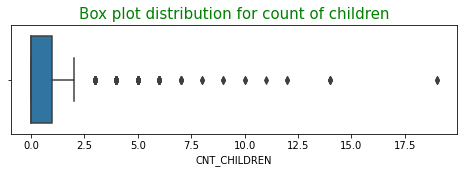

In [80]:
# 1. CNT_CHILDREN
print(df_app_3["CNT_CHILDREN"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["CNT_CHILDREN"])
plt.title(
    "Box plot distribution for count of children",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. It is quite common to have 6 children but it is very rare to have children greater than 6.
2. Hence, a client having children greater than 6 and equal to 19 is rare and hence an outlier
3. Hence, removing entries where count of children is greater than 6

In [81]:
df_app_3 = df_app_3[df_app_3["CNT_CHILDREN"] <= 6]

count    304510.000000
mean          0.020842
std           0.013808
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


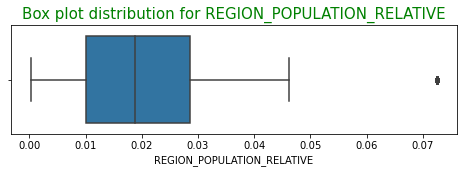

In [82]:
# 2. REGION_POPULATION_RELATIVE
print(df_app_3["REGION_POPULATION_RELATIVE"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["REGION_POPULATION_RELATIVE"])
plt.title(
    "Box plot distribution for REGION_POPULATION_RELATIVE",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. It is possible that the client might be residing at a crowded or uncrowded area
2. Hence, treatment of outliers isn't possible

count    304510.000000
mean        185.608121
std         382.083073
min           0.000000
25%           2.558904
50%           6.084932
75%          15.654795
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64


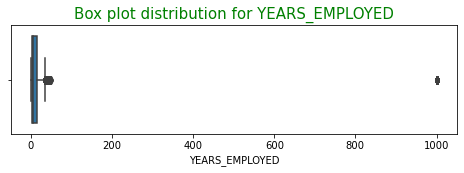

In [83]:
# 3. YEARS_EMPLOYED
print(df_app_3["YEARS_EMPLOYED"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["YEARS_EMPLOYED"])
plt.title(
    "Box plot distribution for YEARS_EMPLOYED",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

In [84]:
np.percentile(df_app_3["YEARS_EMPLOYED"], 81)

29.96164383561644

### Interpretation
1. A person cannot be employed for 1000 years
2. This is definitely an outlier
3. The 81th percentile of years employed is approximately 30 years which is a valid value
4. Hence, filtering out the upper values

In [85]:
df_app_3 = df_app_3[df_app_3["YEARS_EMPLOYED"] <= np.percentile(df_app_3["YEARS_EMPLOYED"], 81)]

count    246654.000000
mean         12.600554
std           8.832059
min           0.000000
25%           5.010959
50%          11.619178
75%          18.887671
max          62.194521
Name: YEARS_REGISTRATION, dtype: float64


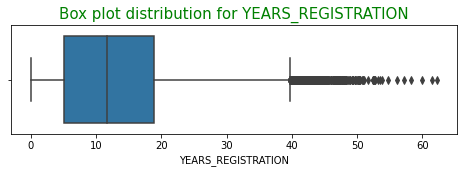

In [86]:
# 4. YEARS_REGISTRATION
print(df_app_3["YEARS_REGISTRATION"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["YEARS_REGISTRATION"])
plt.title(
    "Box plot distribution for YEARS_REGISTRATION",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. The max value is 62 years and it might be a case where the registration information was changed 62 years ago. Hence, removing the values will not be a feasible choice
2. Choice is to cap them and perform further analysis

In [87]:
# 99th percentile is 34 hence, plotting a boxplot where years of registration is below 35 to understand distribution
np.percentile(df_app_3["YEARS_REGISTRATION"], 99)

34.92183561643836

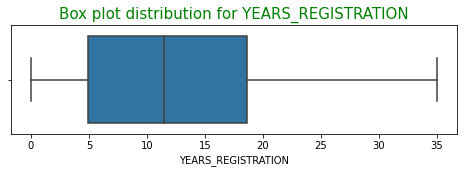

In [88]:
df_years_reg = df_app_3[df_app_3["YEARS_REGISTRATION"] <= 35]
plt.figure(figsize=[8, 2])
sns.boxplot(df_years_reg["YEARS_REGISTRATION"])
plt.title(
    "Box plot distribution for YEARS_REGISTRATION",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. Majority of the people changed their registration approx 18 years ago

count    246654.000000
mean          7.654985
std           4.160323
min           0.000000
25%           4.035616
50%           7.876712
75%          11.441096
max          19.717808
Name: YEARS_ID_PUBLISH, dtype: float64


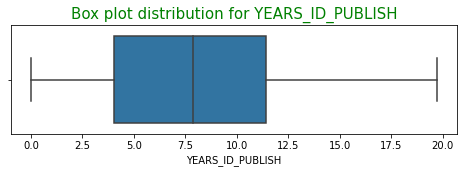

In [89]:
# 5. YEARS_ID_PUBLISH
print(df_app_3["YEARS_ID_PUBLISH"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["YEARS_ID_PUBLISH"])
plt.title(
    "Box plot distribution for YEARS_ID_PUBLISH",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. Majority of the people changed their id before approx 11 years
2. No outliers present

count    246654.000000
mean          2.258175
std           0.939937
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           8.000000
Name: CNT_FAM_MEMBERS, dtype: float64


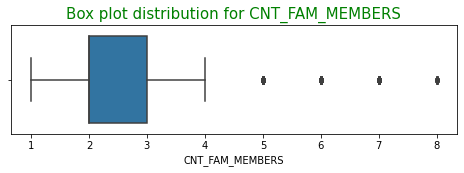

In [90]:
# 6. CNT_FAM_MEMBERS
print(df_app_3["CNT_FAM_MEMBERS"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["CNT_FAM_MEMBERS"])
plt.title(
    "Box plot distribution for CNT_FAM_MEMBERS",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. A family can have 8 members (6 children, client and his/her partner)
2. Hence, the values aren't outlier

count    246654.000000
mean          1.415059
std           2.400852
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


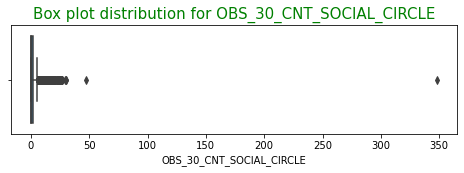

In [91]:
# 7. OBS_30_CNT_SOCIAL_CIRCLE
print(df_app_3["OBS_30_CNT_SOCIAL_CIRCLE"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["OBS_30_CNT_SOCIAL_CIRCLE"])
plt.title(
    "Box plot distribution for OBS_30_CNT_SOCIAL_CIRCLE",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

In [92]:
df_app_3["OBS_30_CNT_SOCIAL_CIRCLE"].quantile([0.80, 0.85, 0.90, 0.95, 0.99, 0.999])

0.800     3.0
0.850     3.0
0.900     4.0
0.950     6.0
0.990    10.0
0.999    16.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Interpretation
1. A person can have a observation of client surrounding upto 20
2. But a person having an observation of surroundings with count of 350 is very rare
3. Hence definitely an outlier

In [93]:
# Checking the number of clients where OBS_30_CNT_SOCIAL_CIRCLE is greater than 20
df_app_3[df_app_3["OBS_30_CNT_SOCIAL_CIRCLE"] > 20].shape

(67, 72)

Since, the count is pretty low, we can filter out these outliers

In [94]:
df_app_3 = df_app_3[df_app_3["OBS_30_CNT_SOCIAL_CIRCLE"] <= 20]

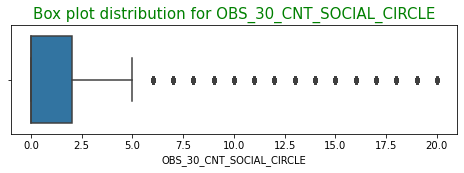

In [95]:
# Replotting box plot for OBS_30_CNT_SOCIAL_CIRCLE
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["OBS_30_CNT_SOCIAL_CIRCLE"])
plt.title(
    "Box plot distribution for OBS_30_CNT_SOCIAL_CIRCLE",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
Majority of the observation of client surroundings is 5

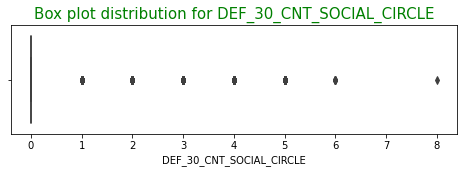

In [96]:
# 8. DEF_30_CNT_SOCIAL_CIRCLE
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["DEF_30_CNT_SOCIAL_CIRCLE"])
plt.title(
    "Box plot distribution for DEF_30_CNT_SOCIAL_CIRCLE",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. Majority of the observations around client surroundings didn't default
2. A value of 8 is a valid and possible value, hence cannot be considered as an outlier

count    246587.000000
mean          1.390783
std           2.248088
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          20.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


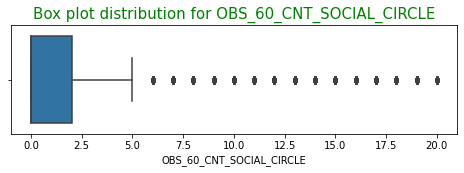

In [97]:
# 9. OBS_60_CNT_SOCIAL_CIRCLE
print(df_app_3["OBS_60_CNT_SOCIAL_CIRCLE"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["OBS_60_CNT_SOCIAL_CIRCLE"])
plt.title(
    "Box plot distribution for OBS_60_CNT_SOCIAL_CIRCLE",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. Majority of the observations around client surroundings are close to 5
2. But in a period of 2 months it is possible that 20 people were observed with 60 dpd
3. Hence, can't be considered as an outlier

count    246587.000000
mean          0.097479
std           0.354382
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


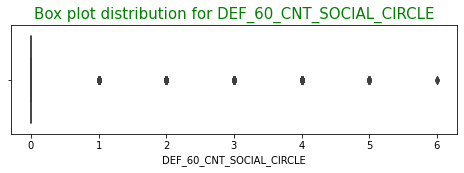

In [98]:
# 10. DEF_60_CNT_SOCIAL_CIRCLE
print(df_app_3["DEF_60_CNT_SOCIAL_CIRCLE"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["DEF_60_CNT_SOCIAL_CIRCLE"])
plt.title(
    "Box plot distribution for DEF_60_CNT_SOCIAL_CIRCLE",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

### Interpretation
1. Majority of the observations around client surroundings didn't default
2. A value of 6 is a valid and possible value, hence cannot be considered as an outlier

count    2.465870e+05
mean     1.758146e+05
std      2.611902e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


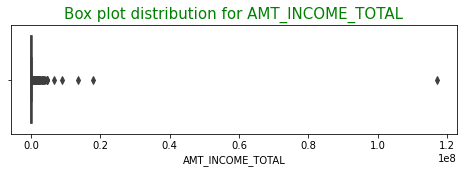

In [99]:
# 11. AMT_INCOME_TOTAL
print(df_app_3["AMT_INCOME_TOTAL"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_app_3["AMT_INCOME_TOTAL"])
plt.title(
    "Box plot distribution for AMT_INCOME_TOTAL",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

In [100]:
df_app_3["AMT_INCOME_TOTAL"].quantile([0.90, 0.95, 0.99, 1.0])

0.90       270000.0
0.95       351000.0
0.99       495000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

### Interpretation
1. People earning salary of 117000000.0 are less likely to opt for loan and default on loan
2. Hence, this is a case of outlier
3. Filtering out high values

In [101]:
df_app_3 = df_app_3[df_app_3["AMT_INCOME_TOTAL"] <= 495000.0]

count    1.236591e+06
mean     1.683821e+01
std      1.446819e+01
min      0.000000e+00
25%      8.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


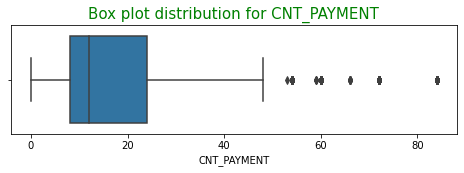

In [102]:
# 11. CNT_PAYMENT
print(df_prev_4["CNT_PAYMENT"].describe())
plt.figure(figsize=[8, 2])
sns.boxplot(df_prev_4["CNT_PAYMENT"])
plt.title(
    "Box plot distribution for CNT_PAYMENT",
    fontdict={
        "fontsize": 15,
        "fontweight": 5,
        "color": "green"
    }
)
plt.show()

In [103]:
df_prev_4["CNT_PAYMENT"].quantile([0.80, 0.85, 0.90, 0.95, 0.99])

0.80    24.0
0.85    30.0
0.90    36.0
0.95    48.0
0.99    60.0
Name: CNT_PAYMENT, dtype: float64

### Interpretation
1. Assuming that the CNT_PAYMENT means the number of payments to be made for clearing off the loan
2. Hence, a value of 60 or above can't be considered as an outlier

# 10. Pre visualization operations

## a. Resetting index of both the dataframes and storing into a final updated dataframe

In [104]:
df_app_final = df_app_3.reset_index(drop=True).copy()
df_prev_final = df_prev_4.reset_index(drop=True).copy()

## b. Previsualization style creation

In [105]:
title = {
    "fontsize": 18,
    "fontweight": 5,
    "color": "green"
}

labels = {
    "fontsize": 12,
    "fontweight": 5,
    "color": "brown"
}

# 11. Univariate Analysis

## a. Application Data

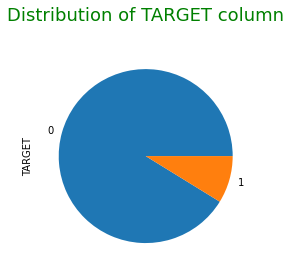

In [106]:
# Data Imbalace Check
# Univariate Analysis - TARGET
df_app_final["TARGET"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of TARGET column\n", fontdict=title)
plt.show()

### Interpretation
1. Maximum percentage of people haven't defaulted on the loan

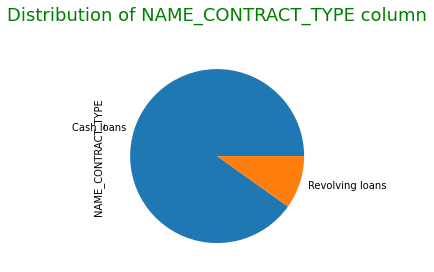

In [107]:
# Univariate Analysis - NAME_CONTRACT_TYPE
df_app_final["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of NAME_CONTRACT_TYPE column\n", fontdict=title)
plt.show()

### Interpretation
1. Cash loans are the most demanded loans

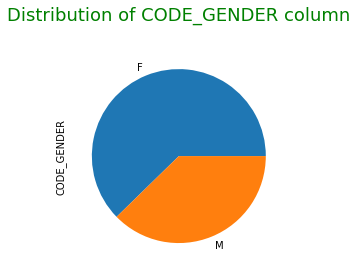

In [108]:
# Univariate Analysis - CODE_GENDER
df_app_final["CODE_GENDER"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of CODE_GENDER column\n", fontdict=title)
plt.show()

### Interpretation
Majority of the loan applicants are female

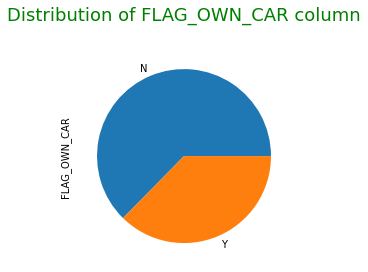

In [109]:
# Univariate Analysis - FLAG_OWN_CAR
df_app_final["FLAG_OWN_CAR"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of FLAG_OWN_CAR column\n", fontdict=title)
plt.show()

### Interpretation
Majority of the loan applicants don't own a car

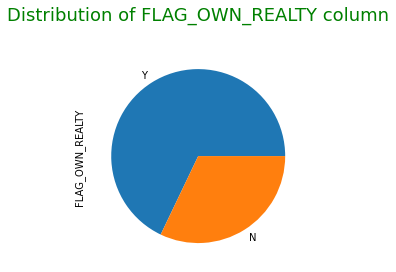

In [110]:
# Univariate Analysis - FLAG_OWN_REALTY
df_app_final["FLAG_OWN_REALTY"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of FLAG_OWN_REALTY column\n", fontdict=title)
plt.show()

### Interpretation
Majority of the loan applicants own a house or flat

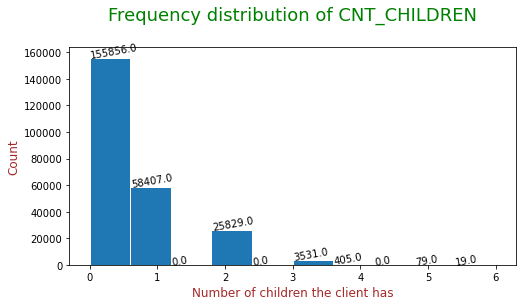

In [111]:
# Univariate Analysis - CNT_CHILDREN
plt.figure(figsize=[8, 4])
yticks, xticks, fig = plt.hist(df_app_final["CNT_CHILDREN"], edgecolor="white")
plt.title("Frequency distribution of CNT_CHILDREN\n", fontdict=title)
plt.xlabel("Number of children the client has", fontdict=labels)
plt.ylabel("Count", fontdict=labels)

for xy in zip(xticks, yticks):
    plt.annotate(text=xy[1], xy=xy, rotation=10)
plt.show()

### Interpretation
Majority of the loan applicants don't have children

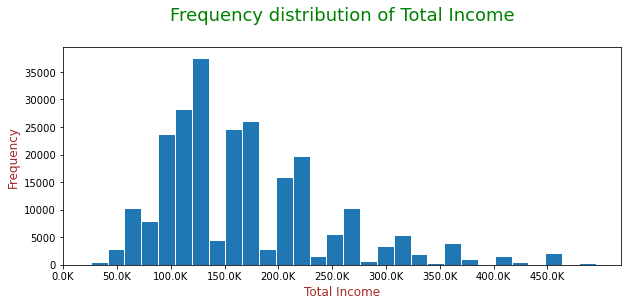

In [112]:
# Univariate Analysis - AMT_INCOME_TOTAL
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["AMT_INCOME_TOTAL"], bins=30, edgecolor="white")
plt.title("Frequency distribution of Total Income\n", fontdict=title)
plt.xlabel("Total Income", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)

x_ticks = np.arange(0, 500000, 50000)
x_labels = [f"{tick/1000}K"for tick in x_ticks]
plt.xticks(x_ticks, x_labels)

plt.show()

### Interpretation
Majority of the loan applicants earn a salary between 50K and 200K

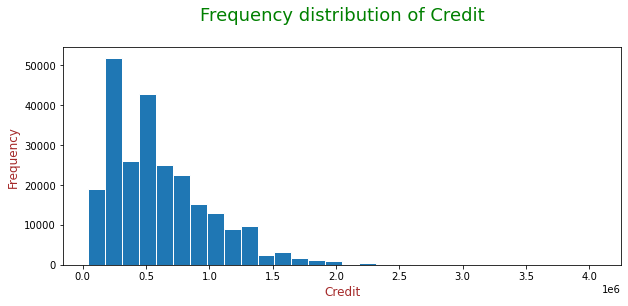

In [113]:
# Univariate Analysis - AMT_CREDIT
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["AMT_CREDIT"], bins=30, edgecolor="white")
plt.title("Frequency distribution of Credit\n", fontdict=title)
plt.xlabel("Credit", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan disbursed is below 10 lakhs

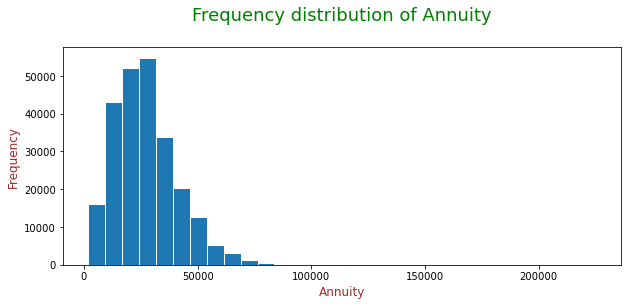

In [114]:
# Univariate Analysis - AMT_ANNUITY
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["AMT_ANNUITY"], bins=30, edgecolor="white")
plt.title("Frequency distribution of Annuity\n", fontdict=title)
plt.xlabel("Annuity", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the annuity distribution is below 50,000

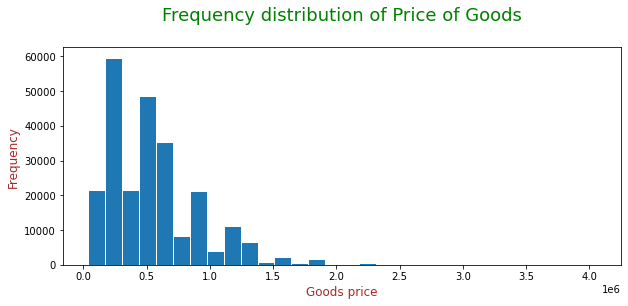

In [115]:
# Univariate Analysis - AMT_GOODS_PRICE
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["AMT_GOODS_PRICE"], bins=30, edgecolor="white")
plt.title("Frequency distribution of Price of Goods\n", fontdict=title)
plt.xlabel("Goods price", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the price of goods fall below 10 lakhs

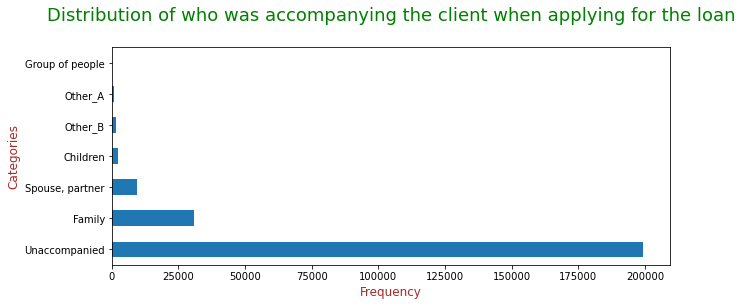

In [116]:
# Univariate Analysis - NAME_TYPE_SUITE
plt.figure(figsize=[10, 4])
df_app_final["NAME_TYPE_SUITE"].value_counts().plot.barh()
plt.title("Distribution of who was accompanying the client when applying for the loan\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicant were unaccompanied

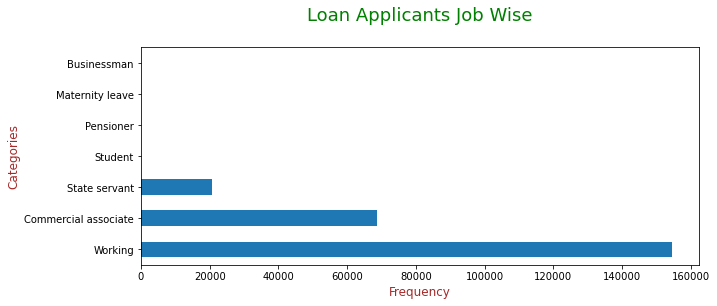

In [117]:
# Univariate Analysis - NAME_INCOME_TYPE
plt.figure(figsize=[10, 4])
df_app_final["NAME_INCOME_TYPE"].value_counts().plot.barh()
plt.title("Loan Applicants Job Wise\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicants are working

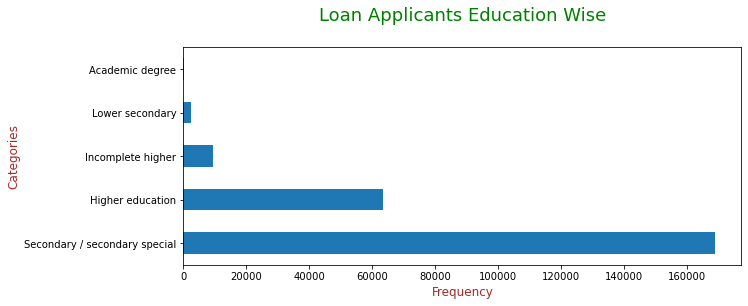

In [118]:
# Univariate Analysis - NAME_EDUCATION_TYPE
plt.figure(figsize=[10, 4])
df_app_final["NAME_EDUCATION_TYPE"].value_counts().plot.barh()
plt.title("Loan Applicants Education Wise\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
1. Majority of the loan applicant have completed their Secondary education
2. Very less percentage of people who completed higher education

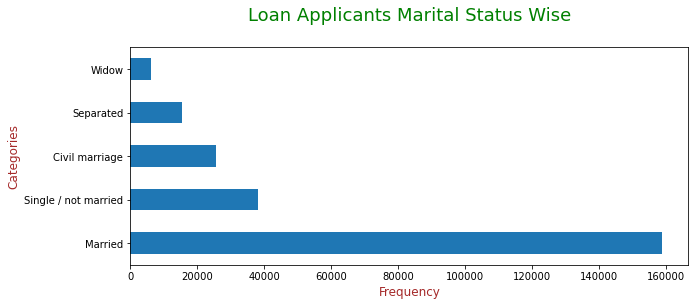

In [119]:
# Univariate Analysis - NAME_FAMILY_STATUS
plt.figure(figsize=[10, 4])
df_app_final["NAME_FAMILY_STATUS"].value_counts().plot.barh()
plt.title("Loan Applicants Marital Status Wise\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicants are married, that means people who are married are likely to go for loans like home loan, personal loan, etc.

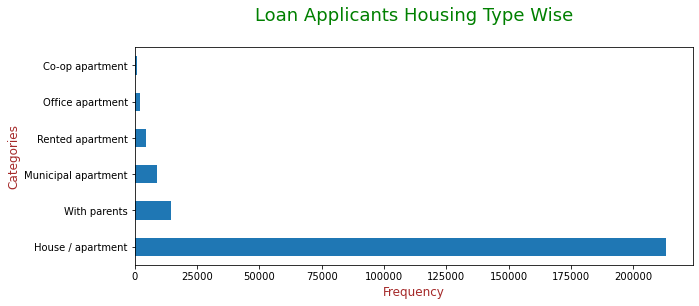

In [120]:
# Univariate Analysis - NAME_HOUSING_TYPE
plt.figure(figsize=[10, 4])
df_app_final["NAME_HOUSING_TYPE"].value_counts().plot.barh()
plt.title("Loan Applicants Housing Type Wise\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

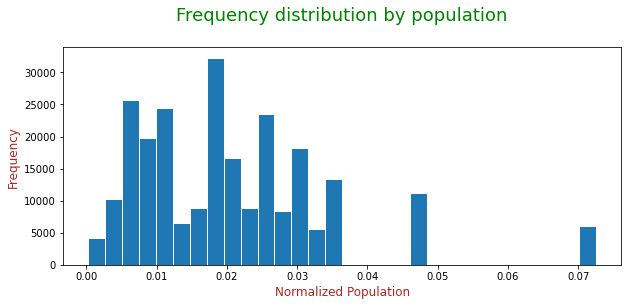

In [121]:
# Univariate Analysis - REGION_POPULATION_RELATIVE
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["REGION_POPULATION_RELATIVE"], bins=30, edgecolor="white")
plt.title("Frequency distribution by population\n", fontdict=title)
plt.xlabel("Normalized Population", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
1. Majority of the loan applicants live in a less crowded area, eg: village, suburbs, etc. This means they may have opted for credit cards, housing loans, personal loans, etc

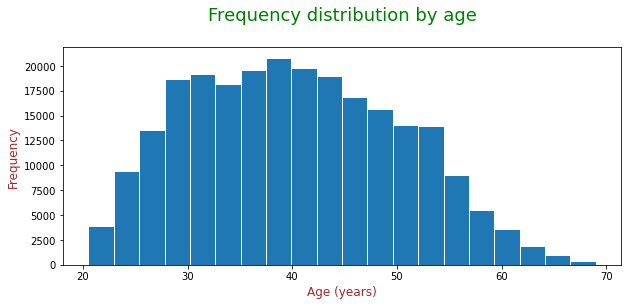

In [122]:
# Univariate Analysis - YEARS_BIRTH
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["YEARS_BIRTH"], bins=20, edgecolor="white")
plt.title("Frequency distribution by age\n", fontdict=title)
plt.xlabel("Age (years)", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
The distribution of age is kind of a normalized distribution. The loan applicants are majorly beween 25 to 55 age category who may have opted for credit cards, home loan, cash loans, etc

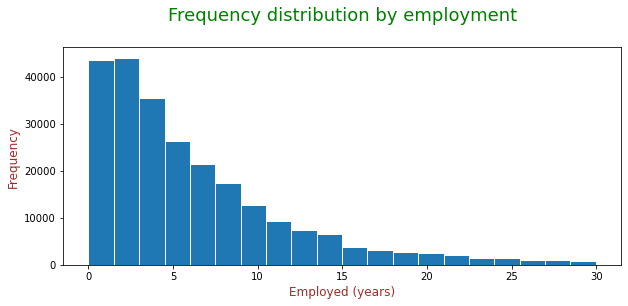

In [123]:
# Univariate Analysis - YEARS_EMPLOYED
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["YEARS_EMPLOYED"], bins=20, edgecolor="white")
plt.title("Frequency distribution by employment\n", fontdict=title)
plt.xlabel("Employed (years)", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
People who have been employed for less than 5 yrs are more likely to opt for a loan. People who have worked for more than 10 years are assumed to be financially stable. Hence, they wont opt for loan

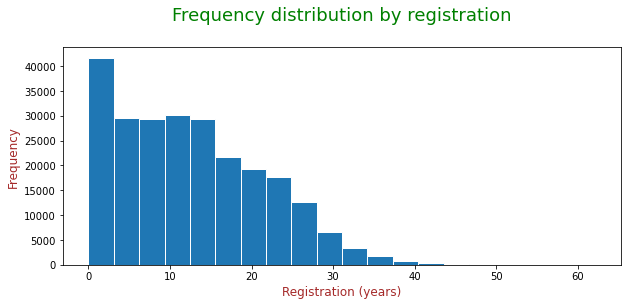

In [124]:
# Univariate Analysis - YEARS_REGISTRATION
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["YEARS_REGISTRATION"], bins=20, edgecolor="white")
plt.title("Frequency distribution by registration\n", fontdict=title)
plt.xlabel("Registration (years)", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the people changed their registration before 10-15 years before application of the current loan

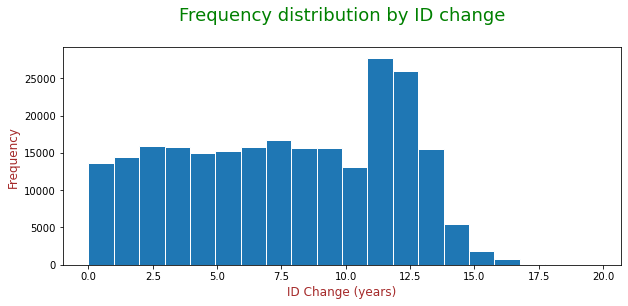

In [125]:
# Univariate Analysis - YEARS_ID_PUBLISH
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["YEARS_ID_PUBLISH"], bins=20, edgecolor="white")
plt.title("Frequency distribution by ID change\n", fontdict=title)
plt.xlabel("ID Change (years)", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
1. Sort of equal distribution across of ID Change

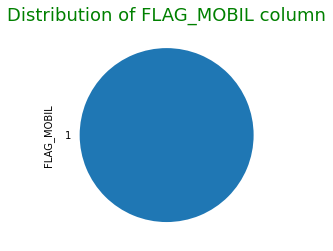

In [126]:
# Univariate Analysis - FLAG_MOBIL
df_app_final["FLAG_MOBIL"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of FLAG_MOBIL column", fontdict=title)
plt.show()

### Interpretation
During the loan application process the phone of the client was captured

In [127]:
# Univariate Analysis - FLAG_EMP_PHONE
df_app_final["FLAG_EMP_PHONE"].value_counts(normalize=True)

1    0.999955
0    0.000045
Name: FLAG_EMP_PHONE, dtype: float64

### Interpretation
Majority of the people have provided work phone

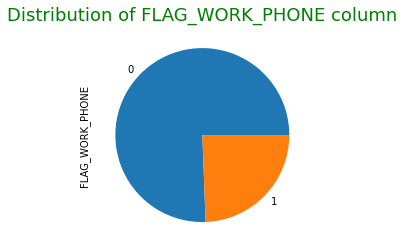

In [128]:
# Univariate Analysis - FLAG_WORK_PHONE
df_app_final["FLAG_WORK_PHONE"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of FLAG_WORK_PHONE column", fontdict=title)
plt.show()

### Interpretation
Majority of the people didn't provide WORK_PHONE

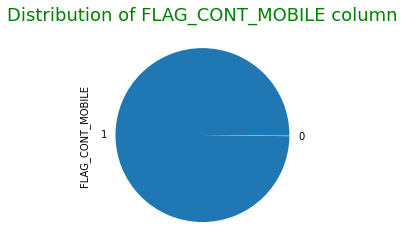

In [129]:
# Univariate Analysis - FLAG_CONT_MOBILE
df_app_final["FLAG_CONT_MOBILE"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of FLAG_CONT_MOBILE column", fontdict=title)
plt.show()

### Interpretation
Majority of the mobile phones captured were reachables

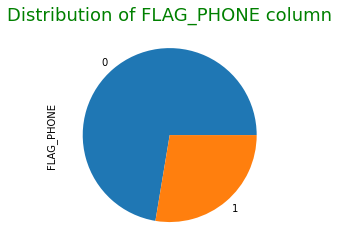

In [130]:
# Univariate Analysis - FLAG_PHONE
df_app_final["FLAG_PHONE"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of FLAG_PHONE column", fontdict=title)
plt.show()

### Interpretation
Majority of the loan applicant didn't provide their home phone

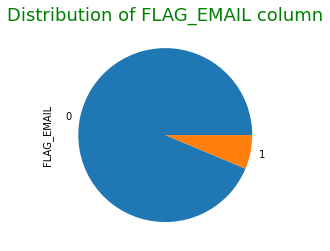

In [131]:
# Univariate Analysis - FLAG_EMAIL
df_app_final["FLAG_EMAIL"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of FLAG_EMAIL column", fontdict=title)
plt.show()

### Interpretation
Majority of the loan applicant didn't provide email

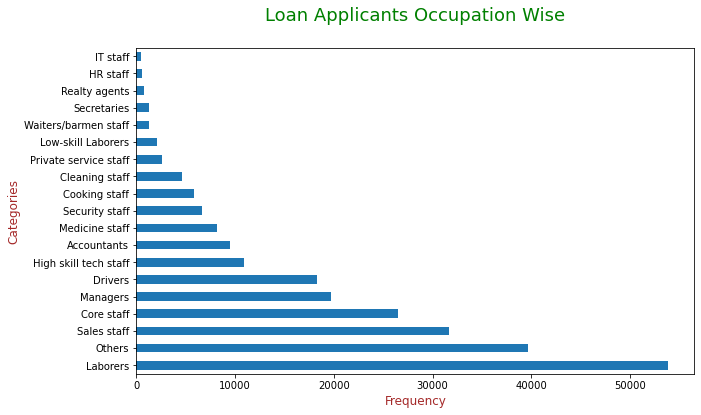

In [132]:
# Univariate Analysis - OCCUPATION_TYPE
plt.figure(figsize=[10, 6])
df_app_final["OCCUPATION_TYPE"].value_counts().plot.barh()
plt.title("Loan Applicants Occupation Wise\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicant are laborers or others. May be because they earn less wage/salary hence they opt for loan in order to fulfil their dreams

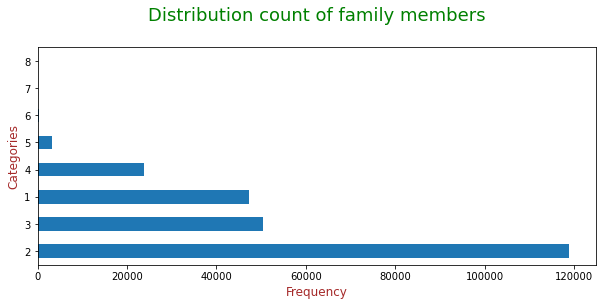

In [133]:
# Univariate Analysis - CNT_FAM_MEMBERS
plt.figure(figsize=[10, 4])
df_app_final["CNT_FAM_MEMBERS"].value_counts().plot.barh()
plt.title("Distribution count of family members\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of loan applicants are a family of 2. We saw earlier that majority of the loan applicant are married, and hence before having kids they may opt for loan

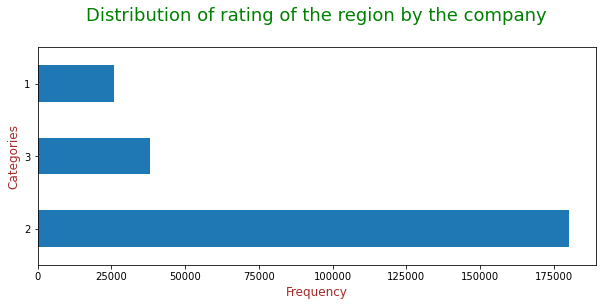

In [134]:
# Univariate Analysis - REGION_RATING_CLIENT
plt.figure(figsize=[10, 4])
df_app_final["REGION_RATING_CLIENT"].value_counts().plot.barh()
plt.title("Distribution of rating of the region by the company\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicant come from a region who live neither in good or bad area

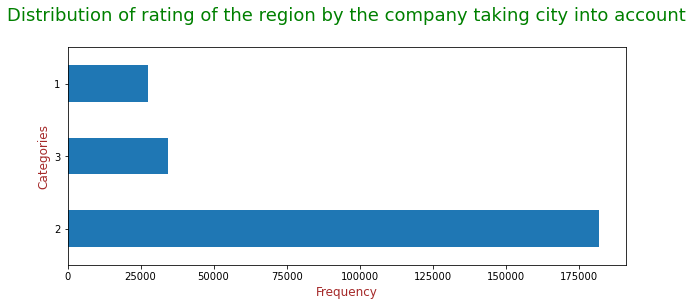

In [135]:
# Univariate Analysis - REGION_RATING_CLIENT_W_CITY
plt.figure(figsize=[10, 4])
df_app_final["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.barh()
plt.title("Distribution of rating of the region by the company taking city into account\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicant come from a region who live neither in good or bad area

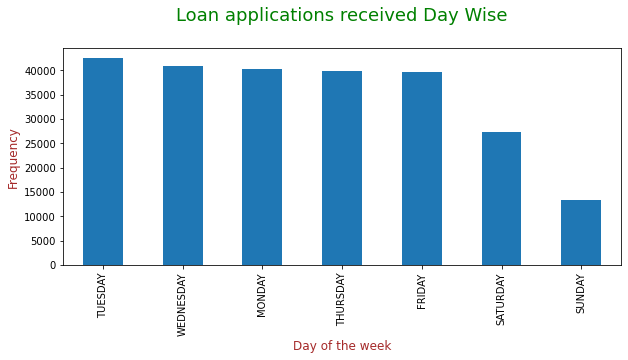

In [136]:
# Univariate Analysis - WEEKDAY_APPR_PROCESS_START
plt.figure(figsize=[10, 4])
df_app_final["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.bar()
plt.title("Loan applications received Day Wise\n", fontdict=title)
plt.xlabel("Day of the week", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applications received are in the first 5 days of the week

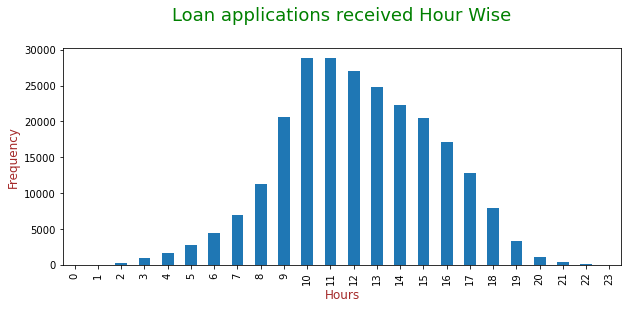

In [137]:
# Univariate Analysis - HOUR_APPR_PROCESS_START
plt.figure(figsize=[10, 4])
df_app_final["HOUR_APPR_PROCESS_START"].value_counts().sort_index().plot.bar()
plt.title("Loan applications received Hour Wise\n", fontdict=title)
plt.xlabel("Hours", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applications are received from 10:00 am to 3:00 pm

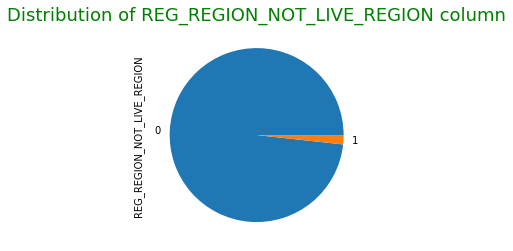

In [138]:
# Univariate Analysis - REG_REGION_NOT_LIVE_REGION
df_app_final["REG_REGION_NOT_LIVE_REGION"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of REG_REGION_NOT_LIVE_REGION column", fontdict=title)
plt.show()

### Interpretation
Some of the loan applications received contains addresses that don't match the permanent address

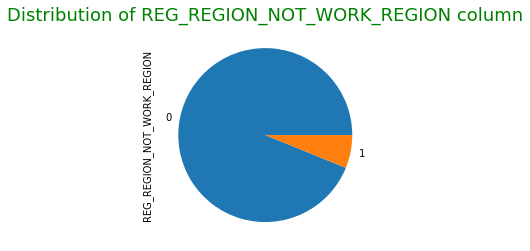

In [139]:
# Univariate Analysis - REG_REGION_NOT_WORK_REGION
df_app_final["REG_REGION_NOT_WORK_REGION"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of REG_REGION_NOT_WORK_REGION column", fontdict=title)
plt.show()

### Interpretation
Some of the loan applications received contains addresses that don't match the work address

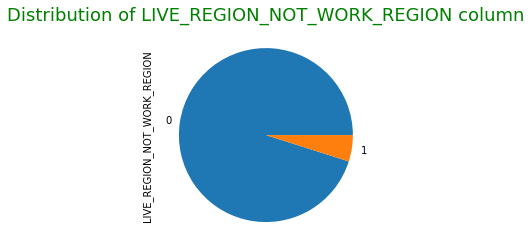

In [140]:
# Univariate Analysis - LIVE_REGION_NOT_WORK_REGION
df_app_final["LIVE_REGION_NOT_WORK_REGION"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of LIVE_REGION_NOT_WORK_REGION column", fontdict=title)
plt.show()

### Interpretation
Some of the loan applications received contains contact addresses that don't match the work address

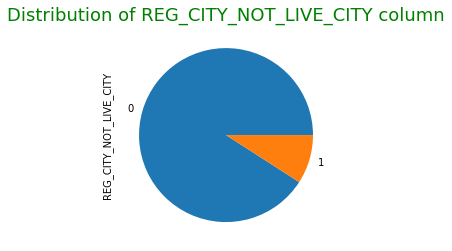

In [141]:
# Univariate Analysis - REG_CITY_NOT_LIVE_CITY
df_app_final["REG_CITY_NOT_LIVE_CITY"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of REG_CITY_NOT_LIVE_CITY column", fontdict=title)
plt.show()

### Interpretation
Some of the loan applications received contains permanent address city that don't match the contact address city

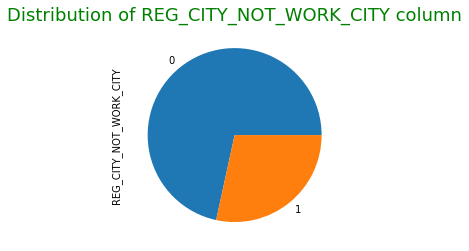

In [142]:
# Univariate Analysis - REG_CITY_NOT_WORK_CITY
df_app_final["REG_CITY_NOT_WORK_CITY"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of REG_CITY_NOT_WORK_CITY column", fontdict=title)
plt.show()

### Interpretation
Some of the loan applications received contains permanent address city that don't match the work address city

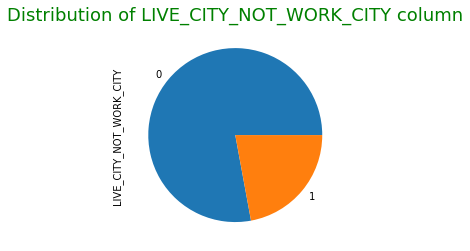

In [143]:
# Univariate Analysis - LIVE_CITY_NOT_WORK_CITY
df_app_final["LIVE_CITY_NOT_WORK_CITY"].value_counts(normalize=True).plot.pie()
plt.title("Distribution of LIVE_CITY_NOT_WORK_CITY column", fontdict=title)
plt.show()

### Interpretation
Some of the loan applications received contains contact address city that don't match the work address city

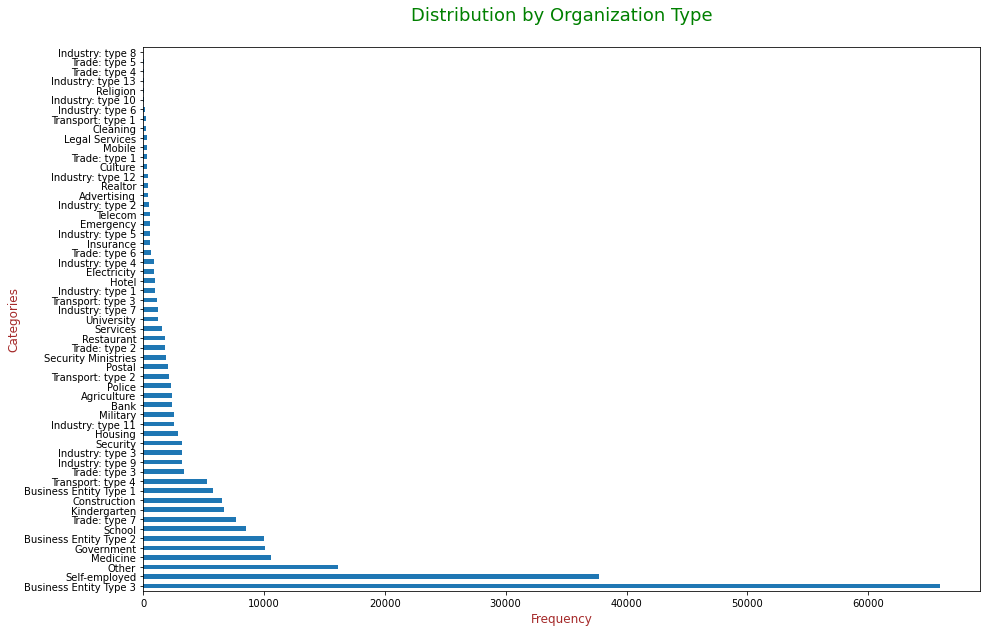

In [144]:
# Univariate Analysis - ORGANIZATION_TYPE
plt.figure(figsize=[15, 10])
df_app_final["ORGANIZATION_TYPE"].value_counts().plot.barh()
plt.title("Distribution by Organization Type\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loans disbursed are to business entities and people who are self employed

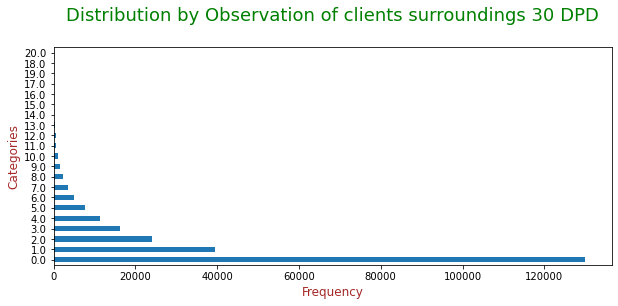

In [145]:
# Univariate Analysis - OBS_30_CNT_SOCIAL_CIRCLE
plt.figure(figsize=[10, 4])
df_app_final["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts().plot.barh()
plt.title("Distribution by Observation of clients surroundings 30 DPD\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Observation of clients surrounding wasn't completed for most of the applications

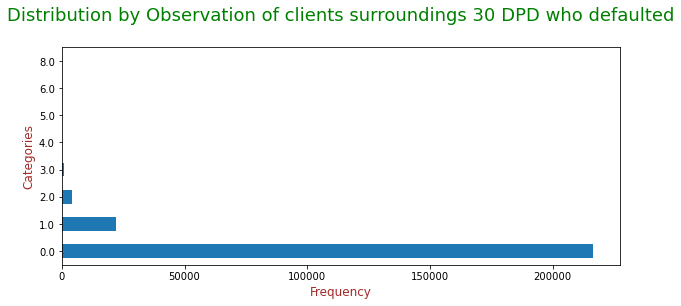

In [146]:
# Univariate Analysis - DEF_30_CNT_SOCIAL_CIRCLE
plt.figure(figsize=[10, 4])
df_app_final["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts().plot.barh()
plt.title("Distribution by Observation of clients surroundings 30 DPD who defaulted\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applications don't have anyone who defaulted on loan in 30 DPD

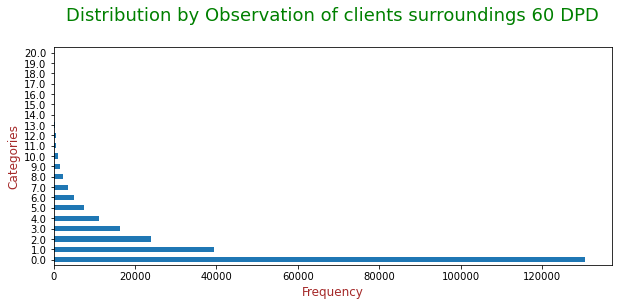

In [147]:
# Univariate Analysis - OBS_60_CNT_SOCIAL_CIRCLE
plt.figure(figsize=[10, 4])
df_app_final["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts().plot.barh()
plt.title("Distribution by Observation of clients surroundings 60 DPD\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Observation of clients surrounding wasn't completed for most of the applications

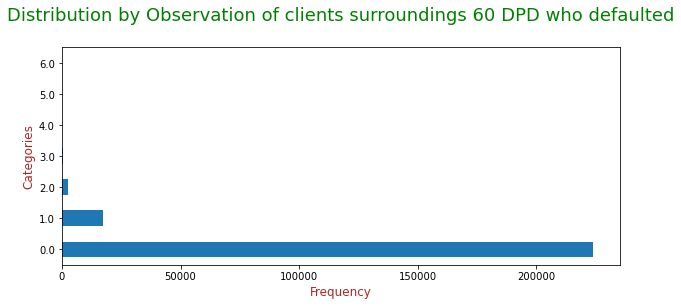

In [148]:
# Univariate Analysis - DEF_60_CNT_SOCIAL_CIRCLE
plt.figure(figsize=[10, 4])
df_app_final["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts().plot.barh()
plt.title("Distribution by Observation of clients surroundings 60 DPD who defaulted\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applications don't have anyone who defaulted on loan in 60 DPD

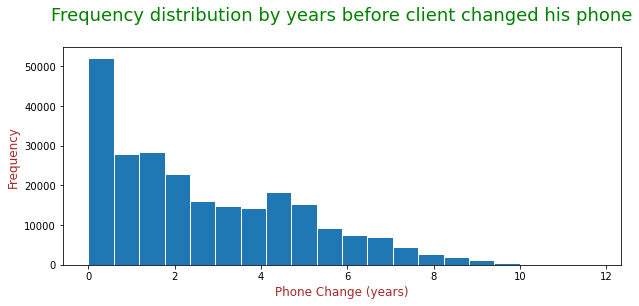

In [149]:
# Univariate Analysis - YEARS_LAST_PHONE_CHANGE
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_app_final["YEARS_LAST_PHONE_CHANGE"], bins=20, edgecolor="white")
plt.title("Frequency distribution by years before client changed his phone\n", fontdict=title)
plt.xlabel("Phone Change (years)", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicants have changed their phone number in the recent 3 years

## b. Previous Application Data

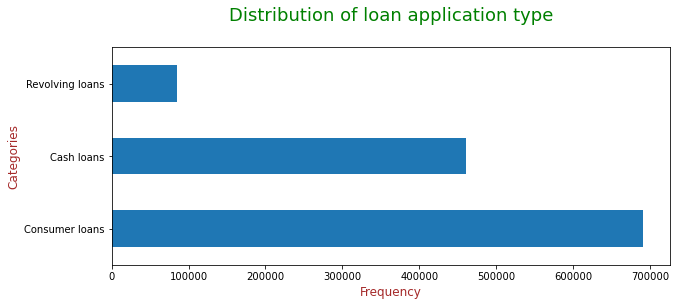

In [150]:
# Univariate Analysis - NAME_CONTRACT_TYPE
plt.figure(figsize=[10, 4])
df_prev_final["NAME_CONTRACT_TYPE"].value_counts().plot.barh()
plt.title("Distribution of loan application type\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Revolving loans aren't opted by most of the loan applicants. They are more interested in cash or consumer loans

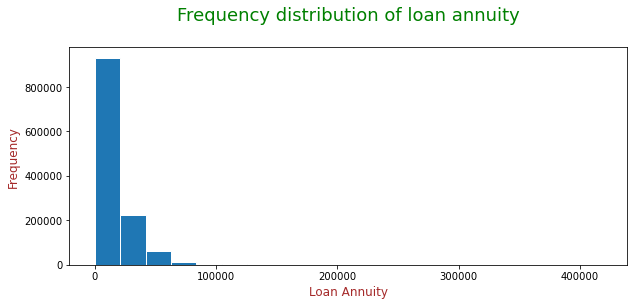

In [151]:
# Univariate Analysis - AMT_ANNUITY
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_prev_final["AMT_ANNUITY"], bins=20, edgecolor="white")
plt.title("Frequency distribution of loan annuity\n", fontdict=title)
plt.xlabel("Loan Annuity", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan annuity amount ranges below 10 lakhs

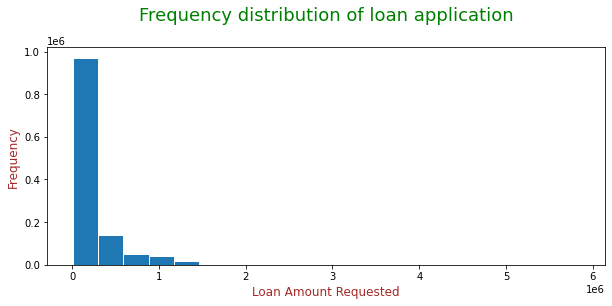

In [152]:
# Univariate Analysis - AMT_APPLICATION
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_prev_final["AMT_APPLICATION"], bins=20, edgecolor="white")
plt.title("Frequency distribution of loan application\n", fontdict=title)
plt.xlabel("Loan Amount Requested", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan requested was for the amount less than 10 lakhs

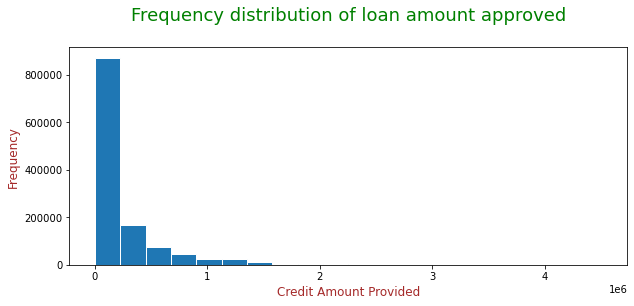

In [153]:
# Univariate Analysis - AMT_CREDIT
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_prev_final["AMT_CREDIT"], bins=20, edgecolor="white")
plt.title("Frequency distribution of loan amount approved\n", fontdict=title)
plt.xlabel("Credit Amount Provided", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Credited amount is less than 5,00,000

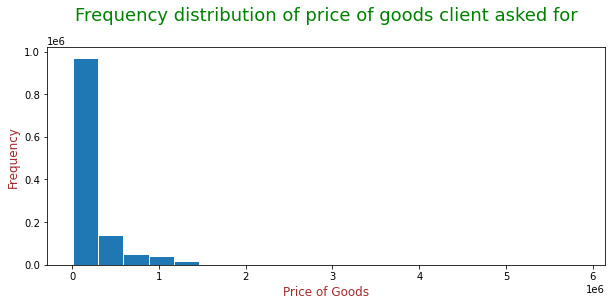

In [154]:
# Univariate Analysis - AMT_GOODS_PRICE
plt.figure(figsize=[10, 4])
yticks, xticks, fig = plt.hist(df_prev_final["AMT_GOODS_PRICE"], bins=20, edgecolor="white")
plt.title("Frequency distribution of price of goods client asked for\n", fontdict=title)
plt.xlabel("Price of Goods", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Price of goods requested by client are majorly below 5,00,000

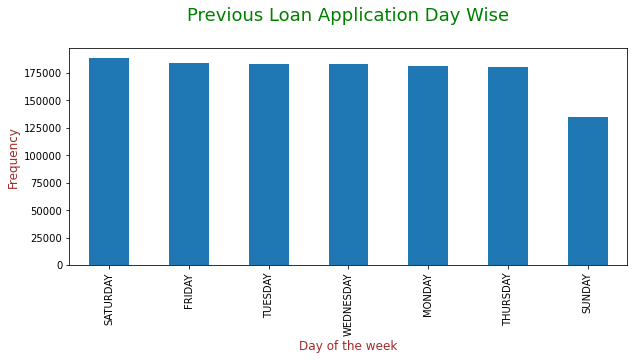

In [155]:
# Univariate Analysis - WEEKDAY_APPR_PROCESS_START
plt.figure(figsize=[10, 4])
df_prev_final["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.bar()
plt.title("Previous Loan Application Day Wise\n", fontdict=title)
plt.xlabel("Day of the week", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majorly loan applications were received on the first six days of the week starting from MONDAY

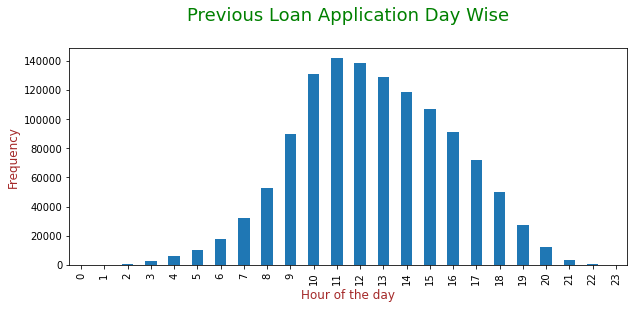

In [156]:
# Univariate Analysis - HOUR_APPR_PROCESS_START
plt.figure(figsize=[10, 4])
df_prev_final["HOUR_APPR_PROCESS_START"].value_counts().sort_index().plot.bar()
plt.title("Previous Loan Application Day Wise\n", fontdict=title)
plt.xlabel("Hour of the day", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applications received were between 10:00 am and 2:00 pm

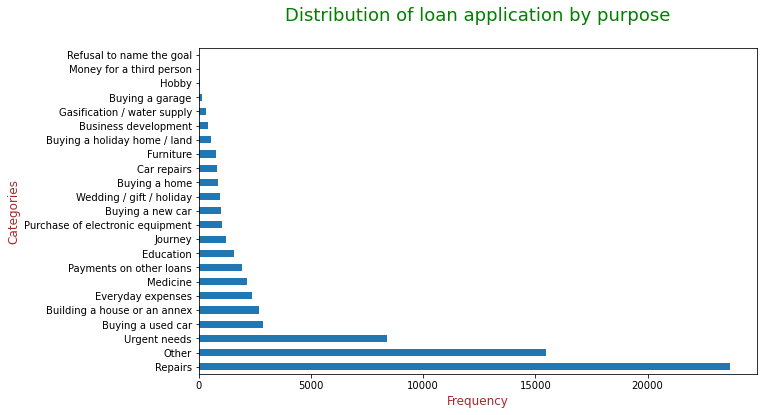

In [157]:
# Univariate Analysis - NAME_CASH_LOAN_PURPOSE

# Filtering out missing values
df_loan_purpose = df_prev_final[df_prev_final["NAME_CASH_LOAN_PURPOSE"] != "Unavailable"]
plt.figure(figsize=[10, 6])
df_loan_purpose["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.barh()
plt.title("Distribution of loan application by purpose\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applicants received were for the purpose of repairs and others

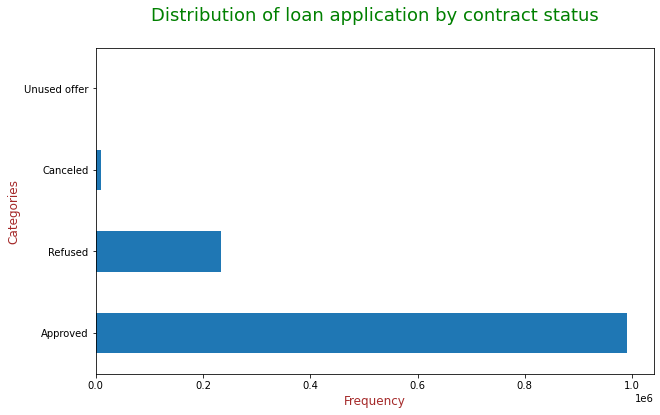

In [158]:
# Univariate Analysis - NAME_CONTRACT_STATUS
plt.figure(figsize=[10, 6])
df_prev_final["NAME_CONTRACT_STATUS"].value_counts().plot.barh()
plt.title("Distribution of loan application by contract status\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the previous loan applications were approved

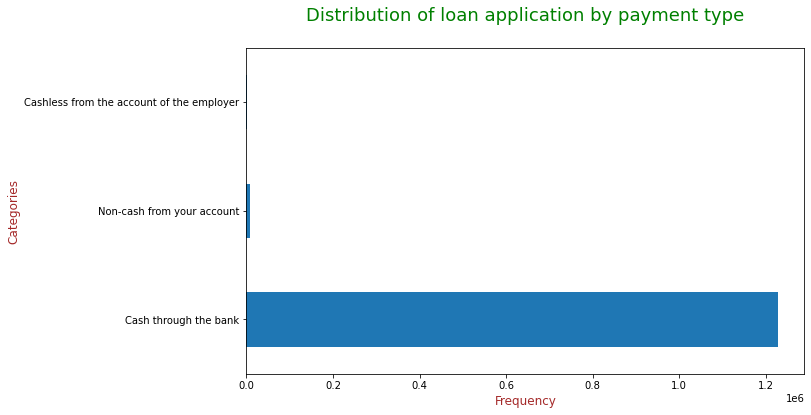

In [159]:
# Univariate Analysis - NAME_PAYMENT_TYPE
plt.figure(figsize=[10, 6])
df_prev_final["NAME_PAYMENT_TYPE"].value_counts().plot.barh()
plt.title("Distribution of loan application by payment type\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan payment type was opted as "Cash through the bank"

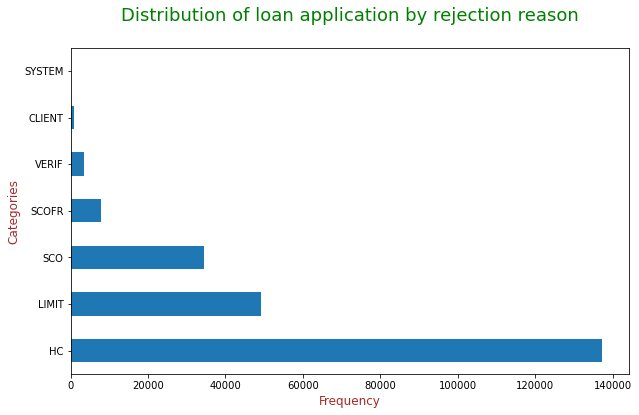

In [160]:
# Univariate Analysis - CODE_REJECT_REASON

# Filtering out missing values
df_reject_reason = df_prev_final[~df_prev_final["CODE_REJECT_REASON"].isin(["XNA", "XAP"])]
plt.figure(figsize=[10, 6])
df_reject_reason["CODE_REJECT_REASON"].value_counts().plot.barh()
plt.title("Distribution of loan application by rejection reason\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the client were rejected due to the reason HC

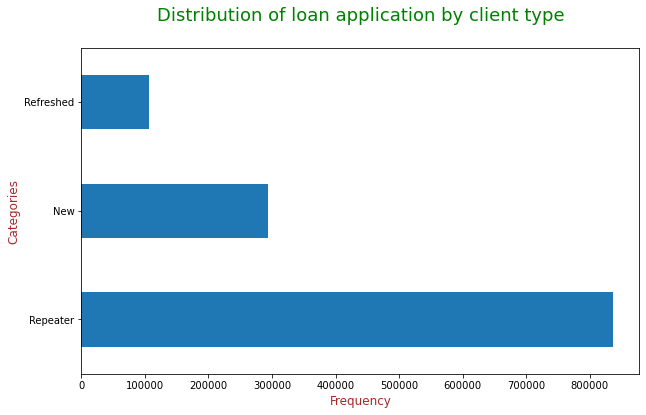

In [161]:
# Univariate Analysis - NAME_CLIENT_TYPE
plt.figure(figsize=[10, 6])
df_prev_final["NAME_CLIENT_TYPE"].value_counts().plot.barh()
plt.title("Distribution of loan application by client type\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan applications received are repeaters

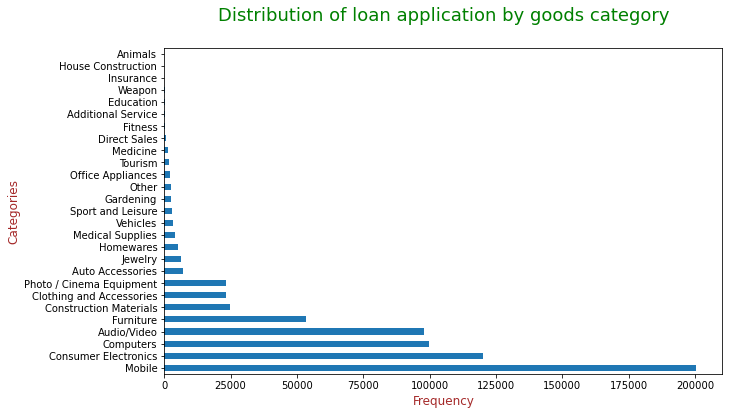

In [162]:
# Univariate Analysis - NAME_GOODS_CATEGORY
df_goods_category = df_prev_final[~df_prev_final["NAME_GOODS_CATEGORY"].isin(["XNA", "XAP"])]
plt.figure(figsize=[10, 6])
df_goods_category["NAME_GOODS_CATEGORY"].value_counts().plot.barh()
plt.title("Distribution of loan application by goods category\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the loan application was taken for mobile, computers, and electronics type of goods

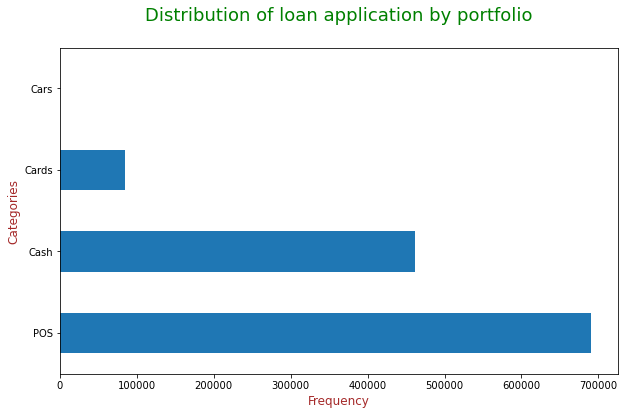

In [163]:
# Univariate Analysis - NAME_PORTFOLIO
plt.figure(figsize=[10, 6])
df_prev_final["NAME_PORTFOLIO"].value_counts().plot.barh()
plt.title("Distribution of loan application by portfolio\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the portfolio was of type POS and Cash

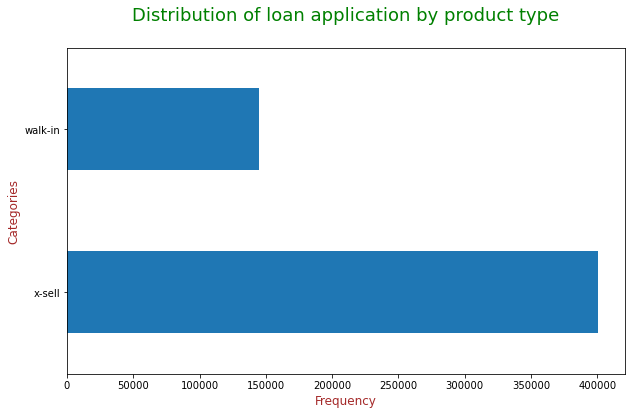

In [164]:
# Univariate Analysis - NAME_PRODUCT_TYPE
# Filtering out the missing values
df_product_type = df_prev_final[~df_prev_final["NAME_PRODUCT_TYPE"].isin(["XNA", "XAP"])]
plt.figure(figsize=[10, 6])
df_product_type["NAME_PRODUCT_TYPE"].value_counts().plot.barh()
plt.title("Distribution of loan application by product type\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the product type are x-sell

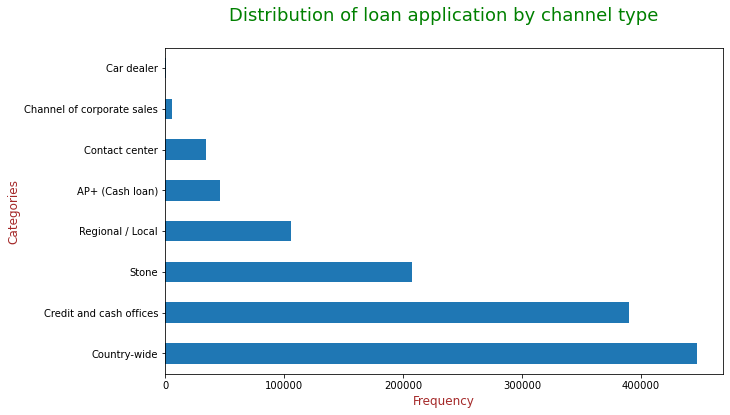

In [165]:
# Univariate Analysis - CHANNEL_TYPE
plt.figure(figsize=[10, 6])
df_prev_final["CHANNEL_TYPE"].value_counts().plot.barh()
plt.title("Distribution of loan application by channel type\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the clients were acquired through the country-wide and credit and cash offices channels

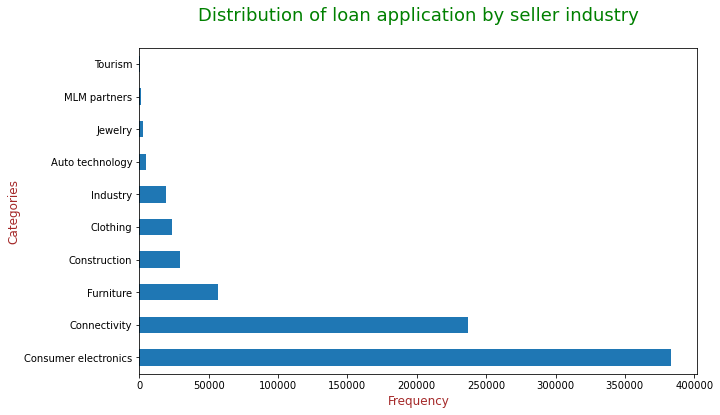

In [166]:
# Univariate Analysis - NAME_SELLER_INDUSTRY
# Filtering out the missing values
df_seller_industry = df_prev_final[~df_prev_final["NAME_SELLER_INDUSTRY"].isin(["XNA", "XAP"])]
plt.figure(figsize=[10, 6])
df_seller_industry["NAME_SELLER_INDUSTRY"].value_counts().plot.barh()
plt.title("Distribution of loan application by seller industry\n", fontdict=title)
plt.xlabel("Frequency", fontdict=labels)
plt.ylabel("Categories", fontdict=labels)
plt.show()

### Interpretation
Majority of the industry of the seller is through consumer electronics

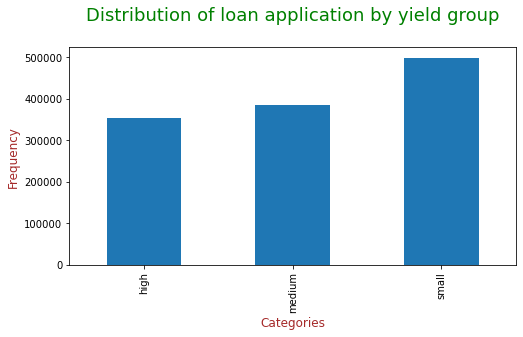

In [167]:
# Univariate Analysis - NAME_YIELD_GROUP
plt.figure(figsize=[8, 4])
df_prev_final["NAME_YIELD_GROUP"].value_counts().sort_index().plot.bar()
plt.title("Distribution of loan application by yield group\n", fontdict=title)
plt.xlabel("Categories", fontdict=labels)
plt.ylabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Majority the yield group were small however medium and high aren't comparatively smaller

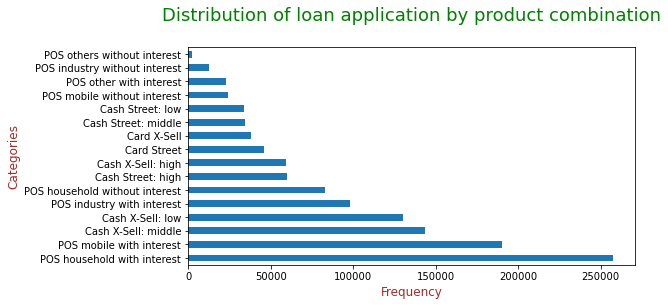

In [168]:
# Univariate Analysis - PRODUCT_COMBINATION
plt.figure(figsize=[8, 4])
df_prev_final["PRODUCT_COMBINATION"].value_counts().plot.barh()
plt.title("Distribution of loan application by product combination\n", fontdict=title)
plt.ylabel("Categories", fontdict=labels)
plt.xlabel("Frequency", fontdict=labels)
plt.show()

### Interpretation
Since POS Category had the majority the same can be verified with the graph of product combination

# 12. Bivariate Analysis

## a. Application data

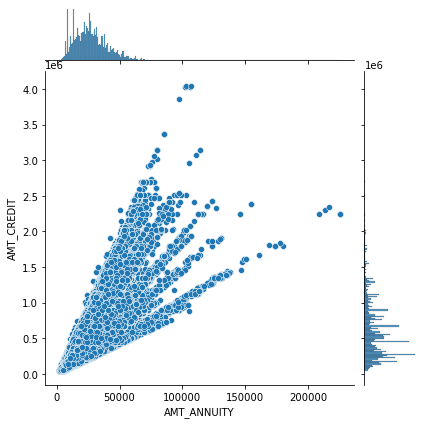

In [169]:
sns.jointplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=df_app_final)
plt.show()

### Interpretation
1. A linear relationship does exist. More the value of annuity higher is the amount of credit

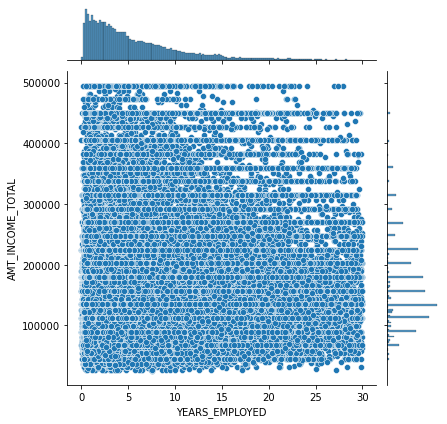

In [170]:
sns.jointplot(x="YEARS_EMPLOYED", y="AMT_INCOME_TOTAL", data=df_app_final)
plt.show()

### Interpretation
Income and Employment don't follow a linear relationship

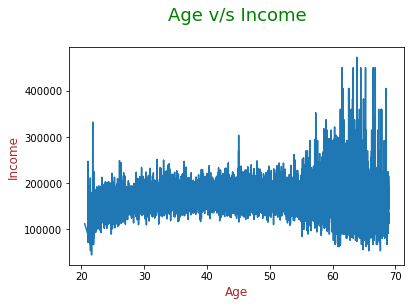

In [171]:
df_app_final.groupby(by="YEARS_BIRTH")["AMT_INCOME_TOTAL"].mean().plot()
plt.title("Age v/s Income\n", fontdict=title)
plt.xlabel("Age", fontdict=labels)
plt.ylabel("Income", fontdict=labels)
plt.show()

### Interpretation
The income remains stable for the between 1,00,000 and 2,00,000 but rises as the age approached is 60+

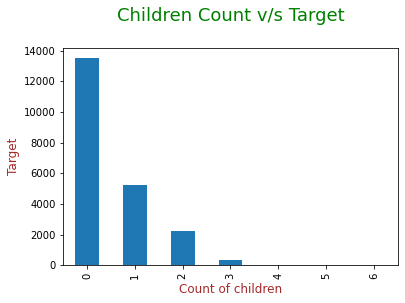

In [172]:
df_app_final.groupby(by="CNT_CHILDREN")["TARGET"].sum().plot.bar()
plt.title("Children Count v/s Target\n", fontdict=title)
plt.xlabel("Count of children", fontdict=labels)
plt.ylabel("Target", fontdict=labels)
plt.show()

### Interpretation
People who don't have children i.e., they are unmarried are most likely to default on the loan taken

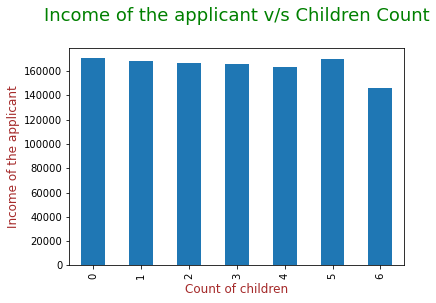

In [173]:
df_app_final.groupby(by="CNT_CHILDREN")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.title("Income of the applicant v/s Children Count\n", fontdict=title)
plt.xlabel("Count of children", fontdict=labels)
plt.ylabel("Income of the applicant", fontdict=labels)
plt.show()

### Interpretation
Not much variation in the income observed as the number of children count increases. However, we can thus induce that the bank should focus on providing loans to the people who are married

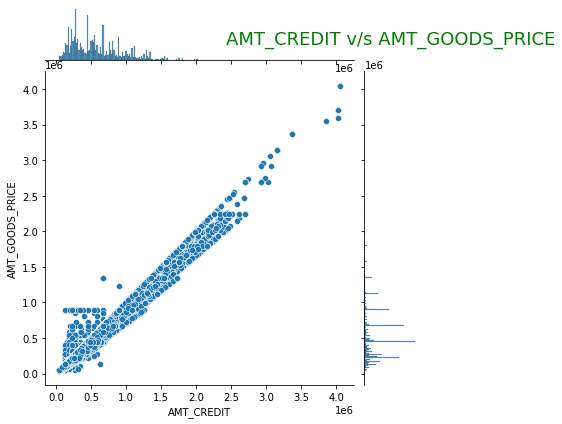

In [174]:
sns.jointplot(x=df_app_final["AMT_CREDIT"], y=df_app_final["AMT_GOODS_PRICE"])
plt.title("AMT_CREDIT v/s AMT_GOODS_PRICE\n", fontdict=title)
plt.show()

### Interpretation
AMT_CREDIT and AMT_GOODS_PRICE share a linear relationship

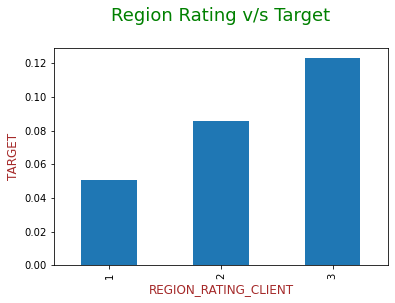

In [175]:
df_app_final.groupby(by="REGION_RATING_CLIENT")["TARGET"].mean().plot.bar()
plt.title("Region Rating v/s Target\n", fontdict=title)
plt.xlabel("REGION_RATING_CLIENT", fontdict=labels)
plt.ylabel("TARGET", fontdict=labels)
plt.show()

### Interpretation
People who live in rating 3 area are more likely to default on the loan taken 

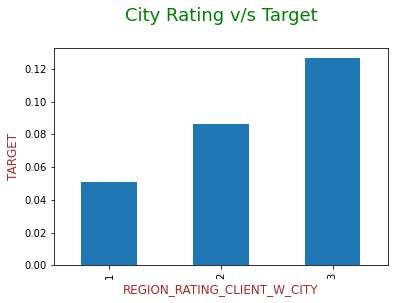

In [176]:
df_app_final.groupby(by="REGION_RATING_CLIENT_W_CITY")["TARGET"].mean().plot.bar()
plt.title("City Rating v/s Target\n", fontdict=title)
plt.xlabel("REGION_RATING_CLIENT_W_CITY", fontdict=labels)
plt.ylabel("TARGET", fontdict=labels)
plt.show()

### Interpretation
Again, loan applicants who reside in rating 3 city are more likely to default

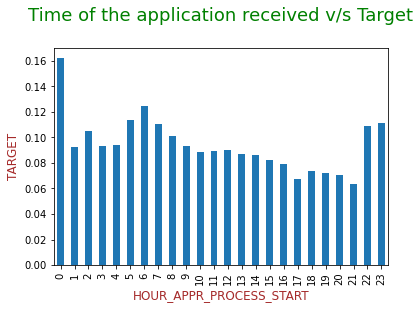

In [177]:
df_app_final.groupby(by="HOUR_APPR_PROCESS_START")["TARGET"].mean().plot.bar()
plt.title("Time of the application received v/s Target\n", fontdict=title)
plt.xlabel("HOUR_APPR_PROCESS_START", fontdict=labels)
plt.ylabel("TARGET", fontdict=labels)
plt.show()

### Interpretation
Loan applications received early in the morning and late at night are most likely to default

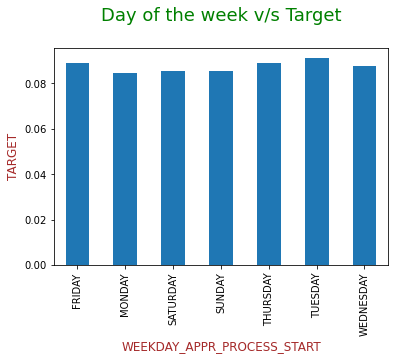

In [178]:
df_app_final.groupby(by="WEEKDAY_APPR_PROCESS_START")["TARGET"].mean().plot.bar()
plt.title("Day of the week v/s Target\n", fontdict=title)
plt.xlabel("WEEKDAY_APPR_PROCESS_START", fontdict=labels)
plt.ylabel("TARGET", fontdict=labels)
plt.show()

### Interpretation
The day doesn't matter when it comes to figuring out the default on loans

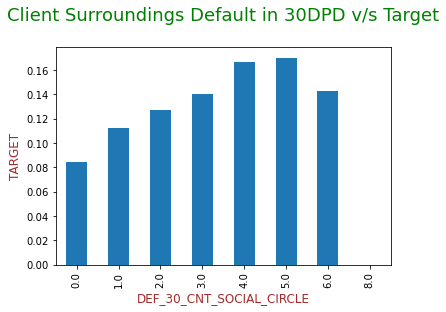

In [179]:
df_app_final.groupby(by="DEF_30_CNT_SOCIAL_CIRCLE")["TARGET"].mean().plot.bar()
plt.title("Client Surroundings Default in 30DPD v/s Target\n", fontdict=title)
plt.xlabel("DEF_30_CNT_SOCIAL_CIRCLE", fontdict=labels)
plt.ylabel("TARGET", fontdict=labels)
plt.show()

### Interpretation
People whose surroundings contain loan applicants who have defaulted in 30 DPD is more than 2, then they are more likely to default on their loan as well

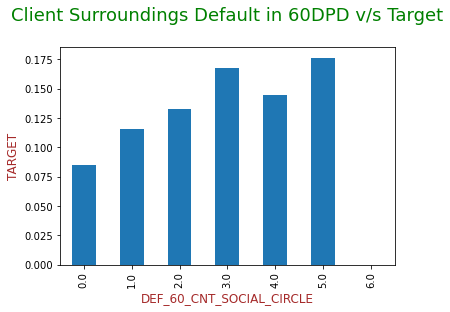

In [180]:
df_app_final.groupby(by="DEF_60_CNT_SOCIAL_CIRCLE")["TARGET"].mean().plot.bar()
plt.title("Client Surroundings Default in 60DPD v/s Target\n", fontdict=title)
plt.xlabel("DEF_60_CNT_SOCIAL_CIRCLE", fontdict=labels)
plt.ylabel("TARGET", fontdict=labels)
plt.show()

### Interpretation
People whose surroundings contain loan applicants who have defaulted in 60 DPD is more than 2, then they are more likely to default on their loan as well

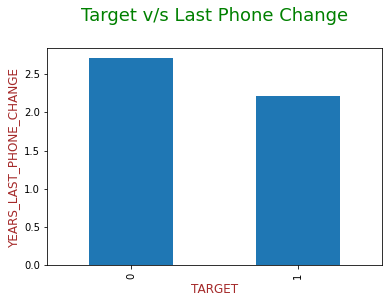

In [181]:
df_app_final.groupby(by="TARGET")["YEARS_LAST_PHONE_CHANGE"].mean().plot.bar()
plt.title("Target v/s Last Phone Change\n", fontdict=title)
plt.xlabel("TARGET", fontdict=labels)
plt.ylabel("YEARS_LAST_PHONE_CHANGE", fontdict=labels)
plt.show()

### Interpretation
People who have defaulted on loans are more likely those who have changed their phone number in the last 2 years

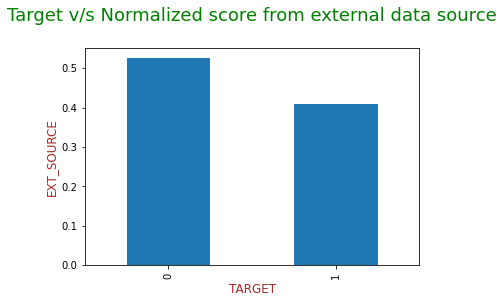

In [182]:
df_app_final.groupby(by="TARGET")["EXT_SOURCE"].mean().plot.bar()
plt.title("Target v/s Normalized score from external data source\n", fontdict=title)
plt.xlabel("TARGET", fontdict=labels)
plt.ylabel("EXT_SOURCE", fontdict=labels)
plt.show()

### Interpretation
People who are more likely to default on loans are those who have less normalized score

## b. Previous application data

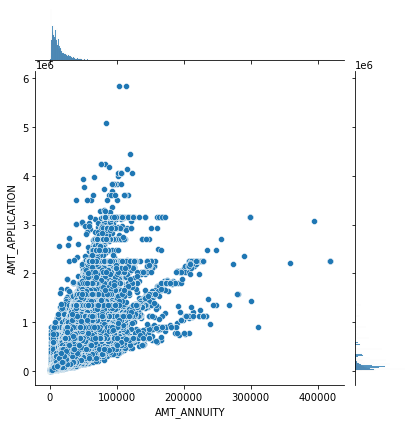

In [183]:
sns.jointplot(x="AMT_ANNUITY", y="AMT_APPLICATION", data=df_prev_final)
plt.show()

### Interpretation
1. A slight linear relationship does exist
2. Higher the loan application higher is the annuity of the loan

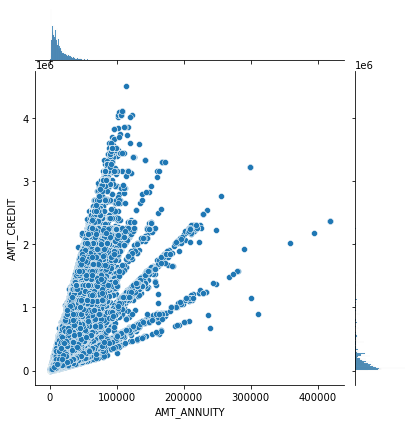

In [184]:
sns.jointplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=df_prev_final)
plt.show()

### Interpretation
1. A linear relationship does exist between annuity and credited amount
2. Higher the amount approved by the bank, higher will be the annuity meaning the interest rate for the loan increases if a higher amount is approved by the bank

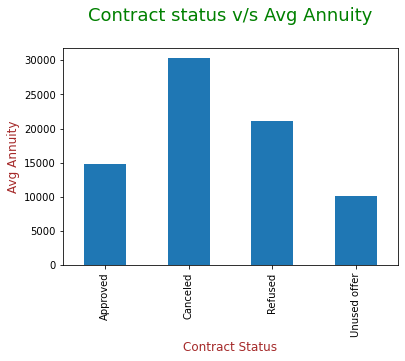

In [185]:
df_prev_final.groupby(by="NAME_CONTRACT_STATUS")["AMT_ANNUITY"].mean().plot.bar()
plt.title("Contract status v/s Avg Annuity\n", fontdict=title)
plt.xlabel("Contract Status", fontdict=labels)
plt.ylabel("Avg Annuity", fontdict=labels)
plt.show()

### Interpretation
1. When the annuity amount is increased, the chances of the client cancelling the loan increases
2. The annuity amount increases when the credit amount increases

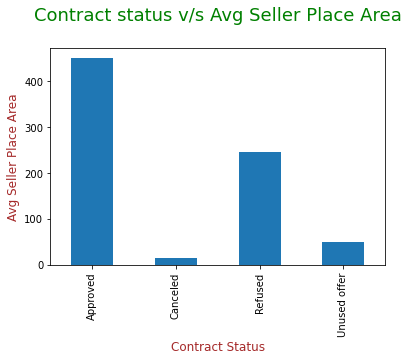

In [186]:
df_prev_final.groupby(by="NAME_CONTRACT_STATUS")["SELLERPLACE_AREA"].mean().plot.bar()
plt.title("Contract status v/s Avg Seller Place Area\n", fontdict=title)
plt.xlabel("Contract Status", fontdict=labels)
plt.ylabel("Avg Seller Place Area", fontdict=labels)
plt.show()

### Interpretation
People having greater selling area are more likely to receive a loan

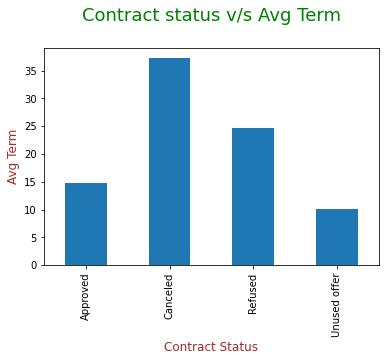

In [187]:
df_prev_final.groupby(by="NAME_CONTRACT_STATUS")["CNT_PAYMENT"].mean().plot.bar()
plt.title("Contract status v/s Avg Term\n", fontdict=title)
plt.xlabel("Contract Status", fontdict=labels)
plt.ylabel("Avg Term", fontdict=labels)
plt.show()

### Interpretation
A higher term of credit signifies that the loan applicant is more likely to reject the loan from his end

# 13. Multivariate Analysis

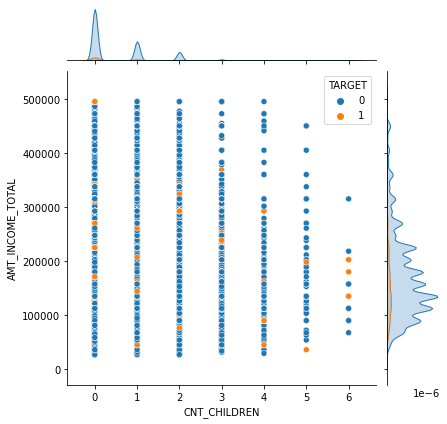

In [188]:
sns.jointplot(x="CNT_CHILDREN", y="AMT_INCOME_TOTAL", data=df_app_final, hue="TARGET")
plt.show()

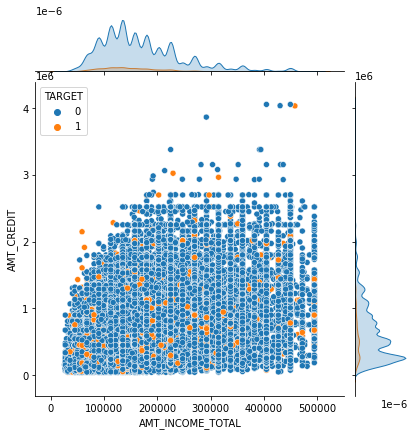

In [189]:
sns.jointplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=df_app_final, hue="TARGET")
plt.show()

### Interpretation
A linear relationship doesn't exist, also the values of target column where it is 1 are spread across <br>

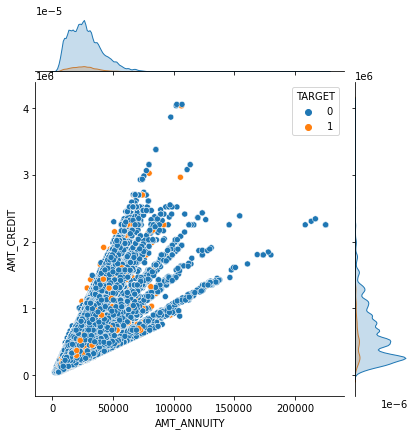

In [190]:
sns.jointplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=df_app_final, hue="TARGET")
plt.show()

### Interpretation
1. A linear relationship does exist. More the value of annuity higher is the amount of credit
2. The datapoints where TARGET = 1 also follows a bell curve suggesting that the person may default on loans where its between 

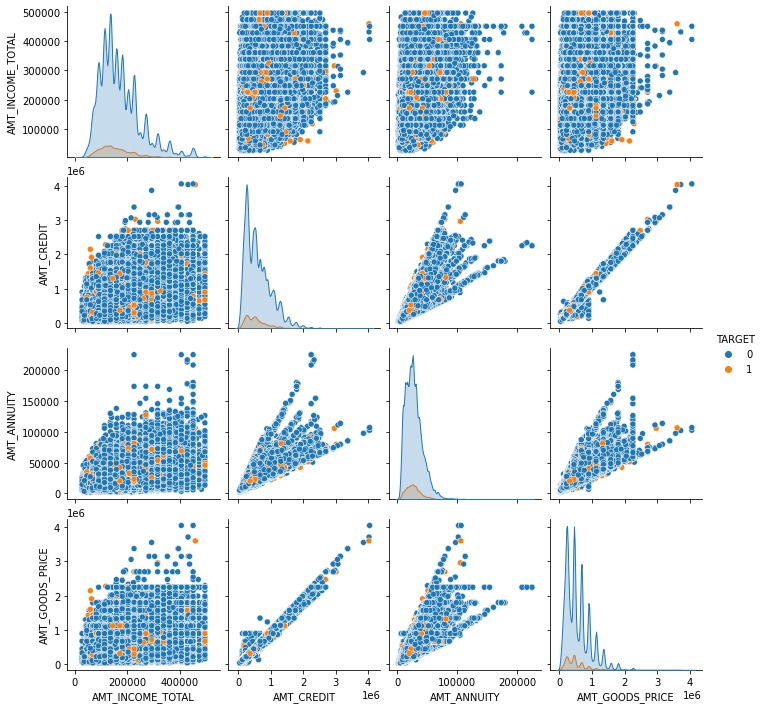

In [191]:
df_app_data_pairpot_1 = df_app_final[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "TARGET"]]
sns.pairplot(hue="TARGET", data=df_app_data_pairpot_1)

In [192]:
pd.pivot_table(data=df_app_final, index="CNT_FAM_MEMBERS", columns="CNT_CHILDREN", values="TARGET")

CNT_CHILDREN,0,1,2,3,4,5,6
CNT_FAM_MEMBERS,,,,,,,
1,0.096072,NaN,NaN,NaN,NaN,NaN,NaN
2,0.082493,0.100899,NaN,NaN,NaN,NaN,NaN
3,NaN,0.088047,0.099681,NaN,NaN,NaN,NaN
4,NaN,NaN,0.086789,0.127753,NaN,NaN,NaN
5,NaN,NaN,NaN,0.095642,0.050000,NaN,NaN
6,NaN,NaN,NaN,NaN,0.135065,0.000000,NaN
7,NaN,NaN,NaN,NaN,NaN,0.066667,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,0.333333


### Interpretation
Loan applicants having family members more than 8 or 6 children have a high chance of defaulting on the loans

# 14. Correlation

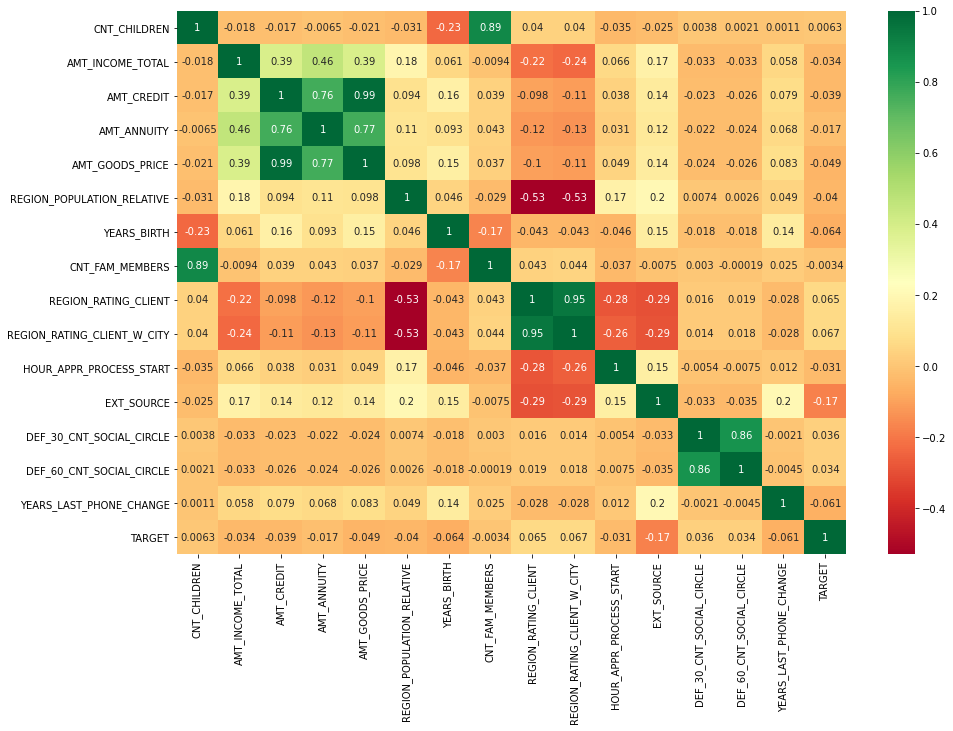

In [193]:
wanted_columns = [
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "REGION_POPULATION_RELATIVE",
    "YEARS_BIRTH",
    "CNT_FAM_MEMBERS",
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "HOUR_APPR_PROCESS_START",
    "EXT_SOURCE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "YEARS_LAST_PHONE_CHANGE",
    "TARGET"
]
plt.figure(figsize=[15, 10])
sns.heatmap(df_app_final[wanted_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

### Interpretation
- Positively correlated variables
    1. AMT_CREDIT and AMT_ANNUITY
    2. AMT_ANNUITY and AMT_GOODS_PRICE
    3. AMT_CREDIT and AMT_GOODS_PRICE
    4. CNT_FAMILY_MEMBERS and CNT_CHILDREN
    5. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY
    6. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE
- Negatively correlated variables
    1. REGION_RATING_CLIENT and TARGET - which means less the rating of the client higher is the probability of default
    2. REGION_RATING_CLIENT and EXT_SOURCE
    3. REGION_RATING_CLIENT_W_CITY and EXT_SOURCE

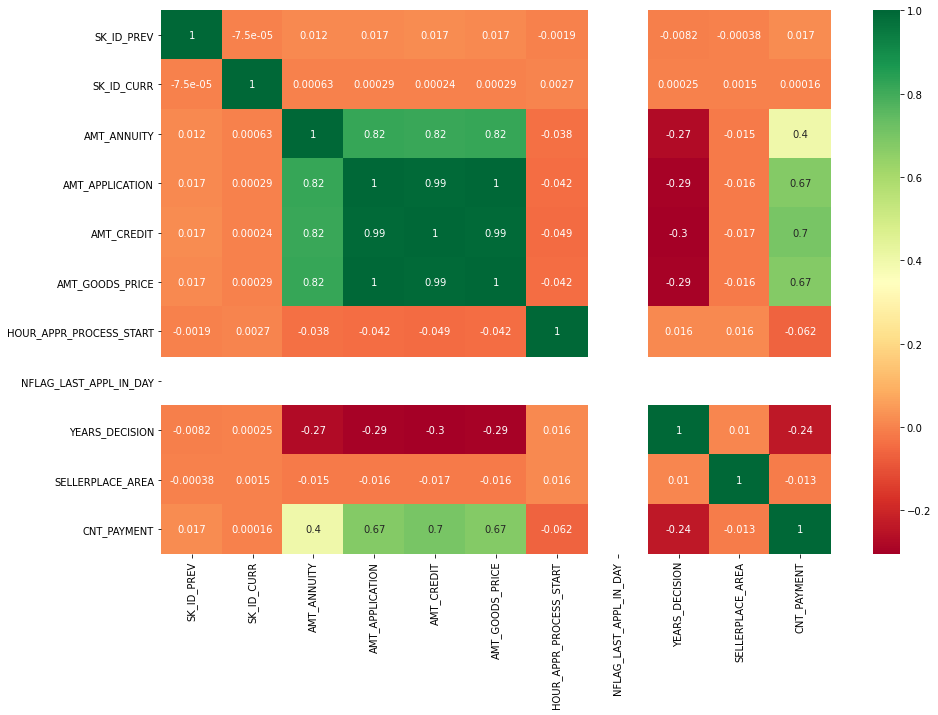

In [194]:
plt.figure(figsize=[15, 10])
sns.heatmap(df_prev_final.corr(), cmap="RdYlGn", annot=True)
plt.show()

### Interpretation
- Positively correlated variables
    1. AMT_ANNUITY and AMT_APPLICATION
    2. AMT_ANNUITY and AMT_CREDIT
    3. AMT_ANNUITY and AMT_GOOD_PRICE
    4. AMT_CREDIT and AMT_GOODS_PRICE
    5. AMT_CREDIT and AMT_APPLICATION
    6. AMT_CREDIT and CNT_PAYMENT
    7. AMT_APPLICATION and CNT_PAYMENT
    8. AMT_GOODS_PRICE and CNT_PAYMENT
- Negatively correlated variables
    1. YEARS_DECISION and AMT_ANNUITY
    2. YEARS_DECISION and AMT_APPLICATION
    3. YEARS_DECISION and AMT_CREDIT
    4. YEARS_DECISION and AMT_GOOD_PRICE

# 15. Analysis of merged dataset

In [195]:
# Choosing only relevant columns
app_cols = [
    "SK_ID_CURR",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "REGION_POPULATION_RELATIVE",
    "YEARS_BIRTH",
    "CNT_FAM_MEMBERS",
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "EXT_SOURCE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "YEARS_LAST_PHONE_CHANGE",
    "TARGET"
]

prev_cols = [
    "SK_ID_CURR",
    "NAME_CONTRACT_TYPE",
    "AMT_ANNUITY",
    "AMT_APPLICATION",
    "AMT_CREDIT",
    "AMT_GOODS_PRICE",
    "NAME_CASH_LOAN_PURPOSE",
    "NAME_CONTRACT_STATUS",
    "NAME_PAYMENT_TYPE",
    "CODE_REJECT_REASON",
    "NAME_PORTFOLIO",
    "NAME_PRODUCT_TYPE",
    "CHANNEL_TYPE",
    "SELLERPLACE_AREA",
    "NAME_SELLER_INDUSTRY",
    "CNT_PAYMENT",
    "NAME_YIELD_GROUP",
    "PRODUCT_COMBINATION",
    "NAME_CLIENT_TYPE"
]

In [196]:
df_merged_data = pd.merge(df_app_final[app_cols], df_prev_final[prev_cols], how="inner", on="SK_ID_CURR", suffixes=("_APP", "_PREV"))

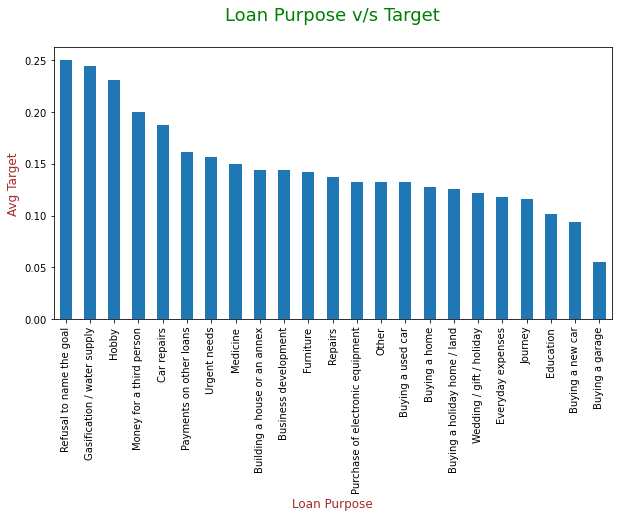

In [197]:
plt.figure(figsize=[10, 5])
df_loan_purpose = df_merged_data[df_merged_data["NAME_CASH_LOAN_PURPOSE"] != "Unavailable"]
df_loan_purpose.groupby(by="NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Loan Purpose v/s Target\n", fontdict=title)
plt.xlabel("Loan Purpose", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

### Interpretation
Loan applicants who refuse to provide reason of borrowing the loan are more likely to default

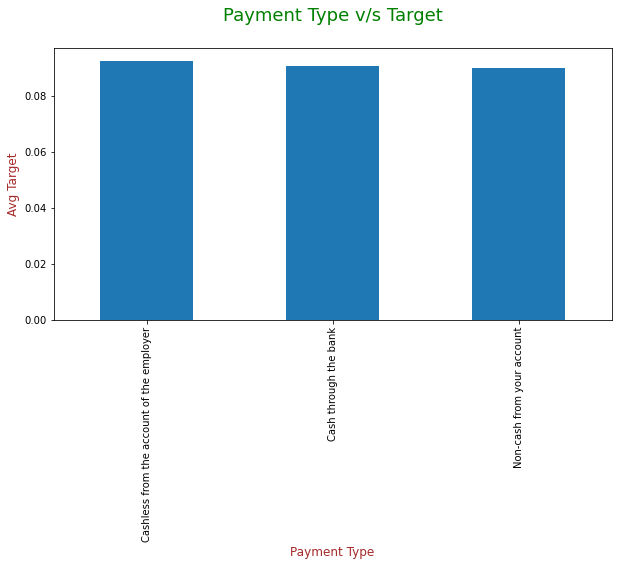

In [198]:
plt.figure(figsize=[10, 5])
df_merged_data.groupby(by="NAME_PAYMENT_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Payment Type v/s Target\n", fontdict=title)
plt.xlabel("Payment Type", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

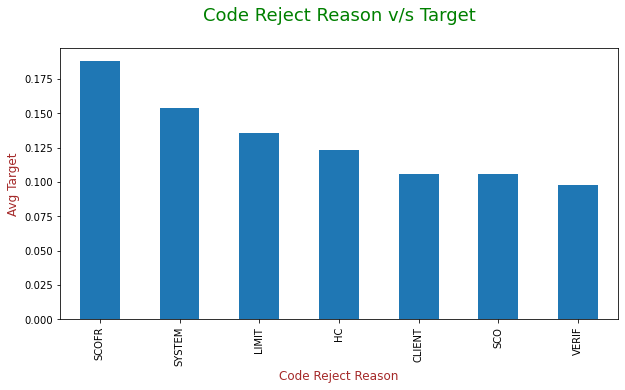

In [199]:
plt.figure(figsize=[10, 5])
df_reject_reason = df_merged_data[~df_merged_data["CODE_REJECT_REASON"].isin(["XAP", "XNA"])]
df_reject_reason.groupby(by="CODE_REJECT_REASON")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Code Reject Reason v/s Target\n", fontdict=title)
plt.xlabel("Code Reject Reason", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

### Interpretation
Loan applicants whose previous application was rejected due to the reason of SCOFR are more likely to default on the current loan

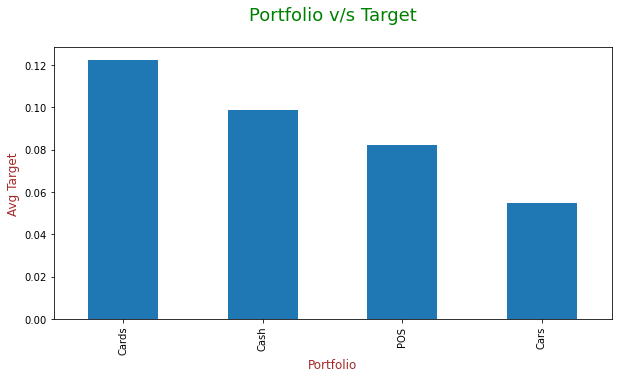

In [200]:
plt.figure(figsize=[10, 5])
df_merged_data.groupby(by="NAME_PORTFOLIO")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Portfolio v/s Target\n", fontdict=title)
plt.xlabel("Portfolio", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

### Interpretation
A lot of loan applicants default on cards

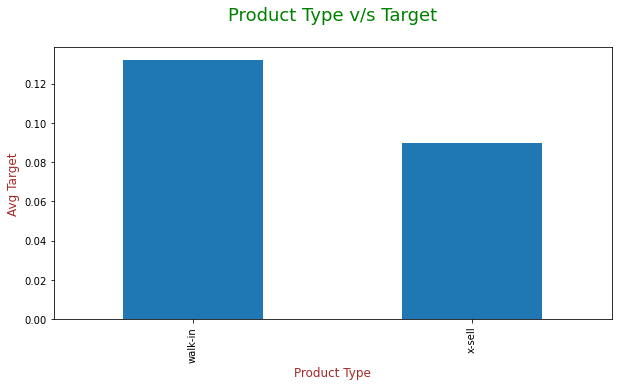

In [201]:
plt.figure(figsize=[10, 5])
df_product_type = df_merged_data[~df_merged_data["NAME_PRODUCT_TYPE"].isin(["XAP", "XNA"])]
df_product_type.groupby(by="NAME_PRODUCT_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Product Type v/s Target\n", fontdict=title)
plt.xlabel("Product Type", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

### Interpretation
Applications that are categorized as walk-in are more likely to default

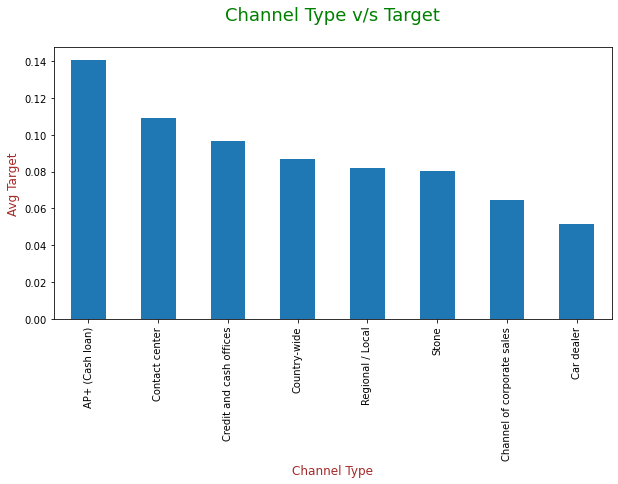

In [202]:
plt.figure(figsize=[10, 5])
df_merged_data.groupby(by="CHANNEL_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Channel Type v/s Target\n", fontdict=title)
plt.xlabel("Channel Type", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

### Interpretation
Loan applicants who were acquired through the channel AP+(cash loan) needs more investigation before sacntioning of the loan

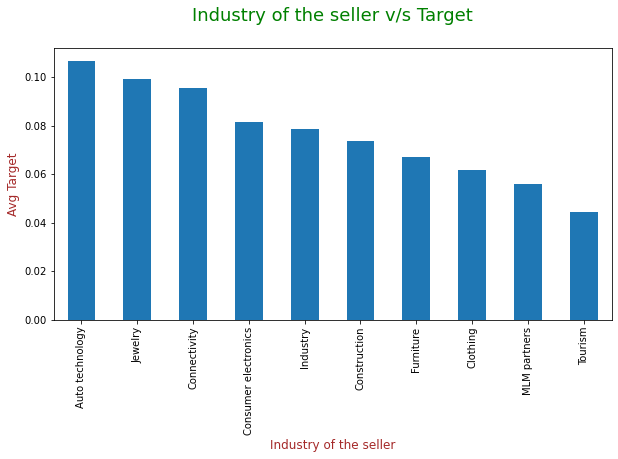

In [203]:
plt.figure(figsize=[10, 5])
df_seller_industry = df_merged_data[~df_merged_data["NAME_SELLER_INDUSTRY"].isin(["XAP", "XNA"])]
df_seller_industry.groupby(by="NAME_SELLER_INDUSTRY")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Industry of the seller v/s Target\n", fontdict=title)
plt.xlabel("Industry of the seller", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

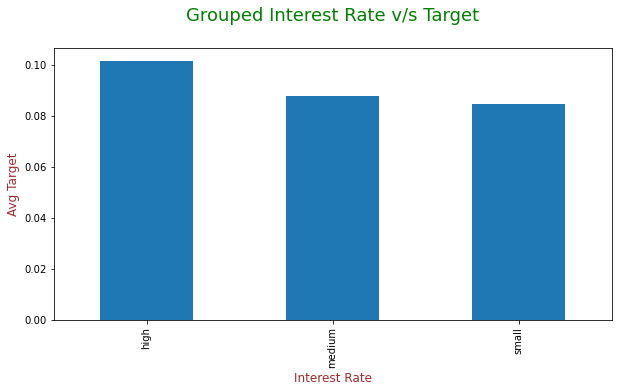

In [204]:
plt.figure(figsize=[10, 5])
df_merged_data.groupby(by="NAME_YIELD_GROUP")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title("Grouped Interest Rate v/s Target\n", fontdict=title)
plt.xlabel("Interest Rate", fontdict=labels)
plt.ylabel("Avg Target", fontdict=labels)
plt.show()

### Interpretation
If the interest rate is high then the loan applicant is more likely to default

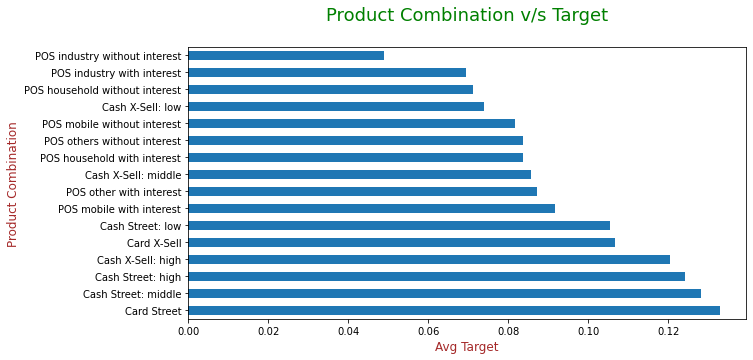

In [205]:
plt.figure(figsize=[10, 5])
df_merged_data.groupby(by="PRODUCT_COMBINATION")["TARGET"].mean().sort_values(ascending=False).plot.barh()
plt.title("Product Combination v/s Target\n", fontdict=title)
plt.ylabel("Product Combination", fontdict=labels)
plt.xlabel("Avg Target", fontdict=labels)
plt.show()

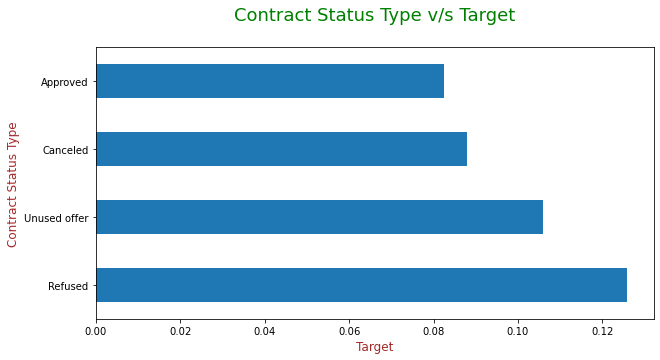

In [206]:
plt.figure(figsize=[10, 5])
df_merged_data.groupby(by="NAME_CONTRACT_STATUS")["TARGET"].mean().sort_values(ascending=False).plot.barh()
plt.title("Contract Status Type v/s Target\n", fontdict=title)
plt.ylabel("Contract Status Type", fontdict=labels)
plt.xlabel("Target", fontdict=labels)
plt.show()

### Interpretation
1. Majority of the loan applicants were refused by the company who were likely to default
2. Howver, a significant applications were approved defaulted later on their payments

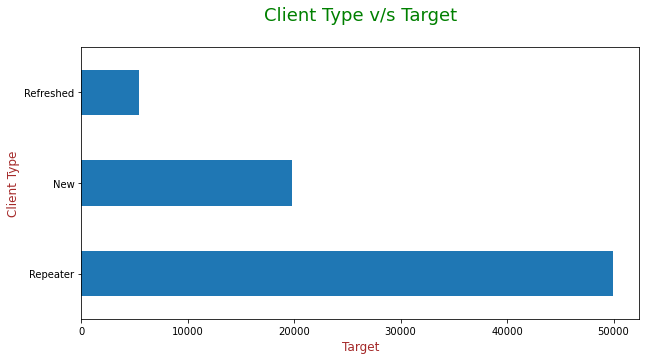

In [208]:
plt.figure(figsize=[10, 5])
df_merged_data.groupby(by="NAME_CLIENT_TYPE")["TARGET"].sum().sort_values(ascending=False).plot.barh()
plt.title("Client Type v/s Target\n", fontdict=title)
plt.ylabel("Client Type", fontdict=labels)
plt.xlabel("Target", fontdict=labels)
plt.show()

### Interpretation
A repeater is most likely to default

# 16. Conclusion
1. Applicants having higher number of children or greater family members are most likely to default on the loan
2. Regional rating of the client having should be 1 or 2
3. If the surrounding of the client has defaulted then it's suspicious
4. If the client has changed his/her phone number recently  then it's suspicious behaviour
5. Client having low external normalized score is more likely to default
6. If the client refuses to provide reason and the purpose of the loan then it's a suspicious behaviour
7. Higher the interest rate higher is the chane of default